In [1]:
import numpy as np
import math
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import scipy as sp
from matplotlib.colors import Normalize, LogNorm
from matplotlib.cm import get_cmap
cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 8]

/tmp/ipykernel_2837004/2456782813.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


In [2]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
# To delete files
import os
from os import listdir
from os.path import isfile, join

mypath = './sim_outputs/naive model/single'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in gz_files:
    os.remove(mypath + f'/{file}')

In [4]:
import re

pattern = re.compile('sim_outputs_1_[0-9]+\.txt\.gz')
bool(pattern.match('sim_outputs_15_100.txt.gz'))

False

In [ ]:
# Create a dataframe out of the ones for a specified step size 
import gzip 
import re
step_size = 15

specified_files = []
for file in gz_files:    
    pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')

    if bool(pattern.match(file)):
        specified_files.append(file)

sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

In [ ]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

x = np.linspace(1, 10000, 10000)
y = 0.01/x

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])


plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
plt.plot(x, y, label="hyperbolic expectation")

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF")
plt.ylabel("frequency")
plt.title(f"Neutral Simulation with run multiplier {step_size}")
plt.savefig(f"plots/neutral_sim_AFs_{step_size}.pdf")
plt.show()

## Selection plots

In [ ]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs/selection'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]

In [ ]:
# We now proceed to get all dataframes for a specific site pair
beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]
site_1 = 1
site_2 = 4

site_1_pos = True
site_2_pos = False

import re

pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

specified_files = []
for file in gz_files:    
    if bool(pattern.match(file)):
        specified_files.append(file)

# Build the dataframe
sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

In [ ]:
# Let's create folders for all of the pairs of values
import os

parent_dir = './plots/selection/'
for i in range(10):
    for j in range(i, 10):
        directory = f'{i}_{j}'
        path = os.path.join(parent_dir, directory)
        os.mkdir(path)


In [ ]:
# Finally, we plot after subsetting for the signage we want
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

def buildSelectionPlot(beta_vals, sim_df, site_1, site_2, site_1_pos, site_2_pos):
    if site_1_pos:
        sim_df = sim_df[sim_df['beta_1'] > 0]
    else:
        sim_df = sim_df[sim_df['beta_1'] < 0]

    if site_2_pos:
        sim_df = sim_df[sim_df['beta_2'] > 0]
    else:
        sim_df = sim_df[sim_df['beta_2'] < 0]

    if site_1_pos:
        site_1_lab = ''
    else:
        site_1_lab = '-'

    if site_2_pos:
        site_2_lab = ''
    else:
        site_2_lab = '-'

    # x = np.linspace(1, 10000, 10000)
    # y = 0.01/x

    ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
    ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
    ks_3, vs_3 = line_scat(sim_df["N11"])


    plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
    plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
    plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
    # plt.plot(x, y, label="hyperbolic expectation")

    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.legend()
    plt.xlabel("AF")
    plt.ylabel("frequency")
    plt.title(f"Simulation with beta_1 = {site_1_lab}{beta_vals[site_1]} and beta_2 = {site_2_lab}{beta_vals[site_2]}")
    plt.savefig(f"plots/selection/{site_1}_{site_2}/selection_sim_AFs_{site_1}_{site_2}_{site_1_pos}_{site_2_pos}.pdf")
    plt.close()


In [ ]:
import re

# Let's make plots for all pairs and all signs
for site_1 in range(3, 10):
    for site_2 in range(site_1, 10):
        # Build the dataframes
        pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

        specified_files = []
        for file in gz_files:    
            if bool(pattern.match(file)):
                specified_files.append(file)

        # Build the dataframe
        sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

        for file in specified_files[1:]:
            try:
                new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
                sim_df = pd.concat([sim_df, new_df])
            except:
                print(f"error file {file}")
        
        # Now plot what we want
        for site_1_pos in [True, False]:
            for site_2_pos in [True, False]:
                buildSelectionPlot(beta_vals, sim_df, site_1, site_2, site_1_pos, site_2_pos)  

        print(f'finished pair ({site_1}, {site_2})')

# Integrating the SFS


/tmp/ipykernel_24196/2826157664.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


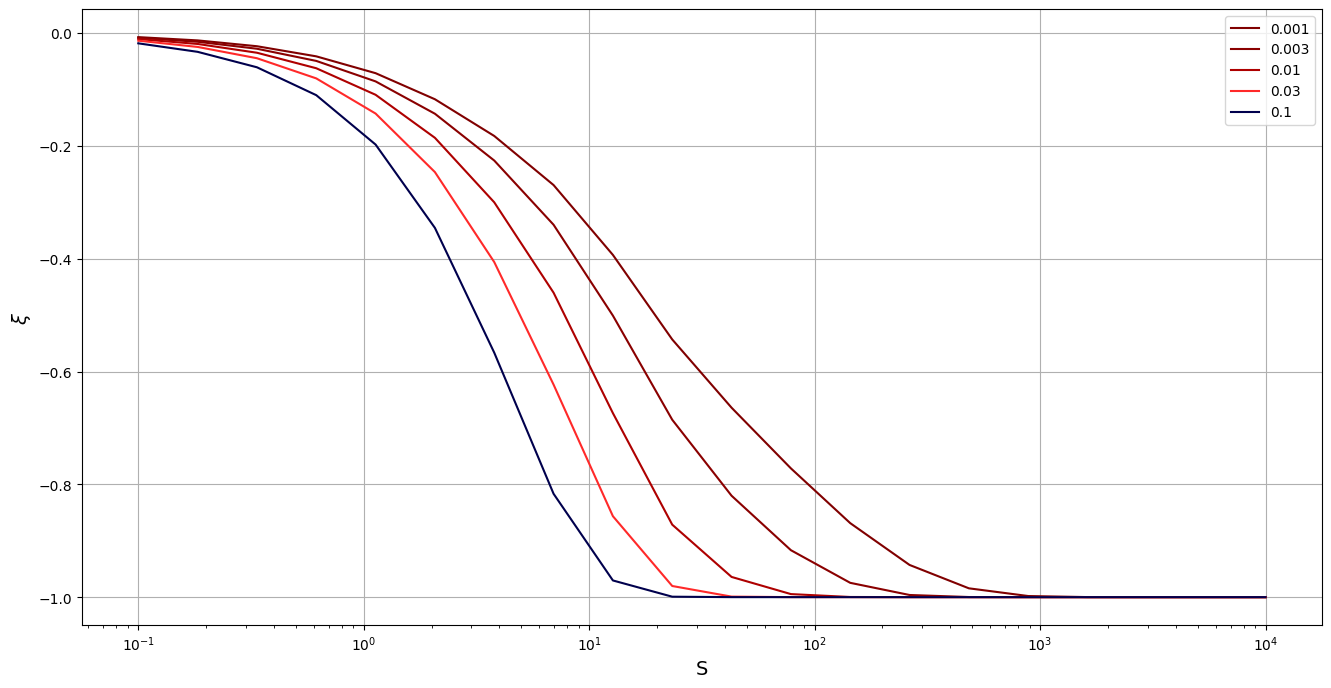

In [2]:
# This is the code to calculate the correlations from selection vals
import numpy as np
import scipy as sp
from scipy.special import erf
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, LogNorm


def sfs_ud_params_sigma(xx, theta, S_ud):
    """Calculate the intensity of the site frequency spectrum under underdominant selection."""
    S_ud = np.abs(S_ud) + 1e-8
    return (theta*np.exp(-S_ud*xx*(1-xx))/(xx*(1-xx))*
                 (1 + erf(np.sqrt(S_ud)*(0.5-xx))/
                 erf(np.sqrt(S_ud)/2)))

ud_burden = lambda xx, theta, sigma: xx*sfs_ud_params_sigma(xx, theta, sigma)


def poly_prob(yy, sigma):
    return sp.integrate.quad(sfs_ud_params_sigma, yy, 1-yy, args=(1, sigma))[0]

def ex_burden(sigma):
    return sp.integrate.quad(ud_burden, 0, 1, args=(1, sigma))[0]

def stab_corr(yy, sigma, pos_d=True, neg_d=False):
    burd = ex_burden(sigma)
    neut_prob = poly_prob(yy, 0)
    double_prob = poly_prob(yy, 4*sigma)
    single_prob = poly_prob(yy, sigma)
    if neg_d:
        return 0
    if pos_d:
        return (double_prob - neut_prob) / (double_prob + neut_prob)
    else:
        return burd * (double_prob - neut_prob) / (burd * (double_prob + neut_prob) + single_prob**2)
    

def stab_corr_posLD_poly(yy, SS):
    def ex_diff(xx):
        return xx * (poly_prob(yy, (2*np.sqrt(SS)-xx*np.sqrt(SS))**2 ) - poly_prob(yy, xx**2*SS)) * sfs_ud_params_sigma(xx, 1, SS)
    def ex_sum(xx):
        return xx * (poly_prob(yy, (2*np.sqrt(SS)-xx*np.sqrt(SS))**2 ) + poly_prob(yy, xx**2*SS)) * sfs_ud_params_sigma(xx, 1, SS)
    return quad(ex_diff, 0, 1)[0] / quad(ex_sum, 0, 1)[0]
    
from matplotlib.colors import Normalize, LogNorm
from matplotlib.cm import get_cmap
cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 20)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()

In [59]:
# corr_df_pos.to_csv('dataframes/corr_pos_demog_neg.csv', sep='\t')
# corr_df_tot.to_csv('dataframes/corr_tot_demog_neg.csv', sep='\t')

In [3]:
from tqdm import tqdm
mypath='/n/scratch/users/s/sjg319/sim_outputs/polygenic/'
gz_files = [f for f in tqdm(listdir(mypath)) if isfile(join(mypath, f))]

100%|██████████| 255000/255000 [01:11<00:00, 3575.19it/s]


In [4]:
from utils.utils import *

pattern = 'polygenic_single'
sim_df = buildDF(0, gz_files, path=mypath, pattern=pattern)

In [ ]:
## We're going to work with the simulations to plot the above curves
# 1. Find all instances where both variants satisfy the MAF threshold
# 2. Calculate correlations
# 3. Calculate the selection coefficients
# 4. Plot and use Fisher transformation for error bars
from scipy.stats import pearsonr
import re

# Step 1
beta_vals = pd.read_csv('betas.txt', header=None).to_numpy().squeeze()
MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]

corr_df_pos = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_neg = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_tot = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
sample_df = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
remove = []
for site in tqdm(np.arange(len(beta_vals))):
        try:
            sim_df = buildDF(site, gz_files, path=mypath, pattern=pattern)
            sim_df[['N00', 'N01', 'N10', 'N11']] /= 20000
            for i, MAF_thr in enumerate(MAF_thr_values):
#                 try:
#                     # For the D > 0 case
#                     sub_df_pos = sim_df[(sim_df['N11']) > MAF_thr]
                    
#                     # Step 2, calculate the correlation and store
#                     r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])
#                     corr_df_pos.iloc[i, site] = r[0]
#                     # sample_df.iloc[i, site] = len(sub_df)
#                 except:
#                     print(f'missed D > 0 for site {site}, {MAF_thr}')

#                 try:
#                     # For the D < 0 case
#                     sub_df_neg = sim_df[(sim_df['N01']) > MAF_thr]
#                     sub_df_neg = sub_df_neg[(sub_df_neg['N10']) > MAF_thr]

#                     r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])
#                     corr_df_neg.iloc[i, site] = r[0]
#                 except:
#                     print(f'missed D < 0 for site {site}, {MAF_thr}')

                try:
                    # For the total case
                    sub_df_tot = sim_df[(sim_df['N01'] + sim_df['N11']) > MAF_thr]
                    sub_df_tot = sub_df_tot[(sub_df_tot['N10'] + sub_df_tot['N11']) > MAF_thr]

                    r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])
                    corr_df_tot.iloc[i, site] = r[0]
                except:
                    print(f'missed all D for site {site}, {MAF_thr}')
        except: 
            print(f'couldnt build {site}')
            remove.append(site)


  0%|          | 0/51 [00:00<?, ?it/s]

In [13]:
# corr_df_tot = pd.read_csv('dataframes/corr_pos_demog_underdom.csv', sep='\t', index_col=0)
corr_df_tot = pd.read_csv('dataframes/simple/fine/corr_csv_neg_d.csv', sep='\t', index_col=0)
beta_vals = pd.read_csv('betas.txt', header=None).to_numpy().squeeze()

new_labs = [2*20000*x**2 for x in beta_vals]
corr_df_tot.columns = new_labs[1:]
corr_df_tot = corr_df_tot.replace(0.0, np.NaN)

# demog_pos = pd.read_csv('dataframes/corr_pos_demog_neg.csv', sep='\t', index_col=0)
# demog_pos.columns = new_labs
# demog_pos = demog_pos.replace(0.0, np.NaN)

# demog_pos

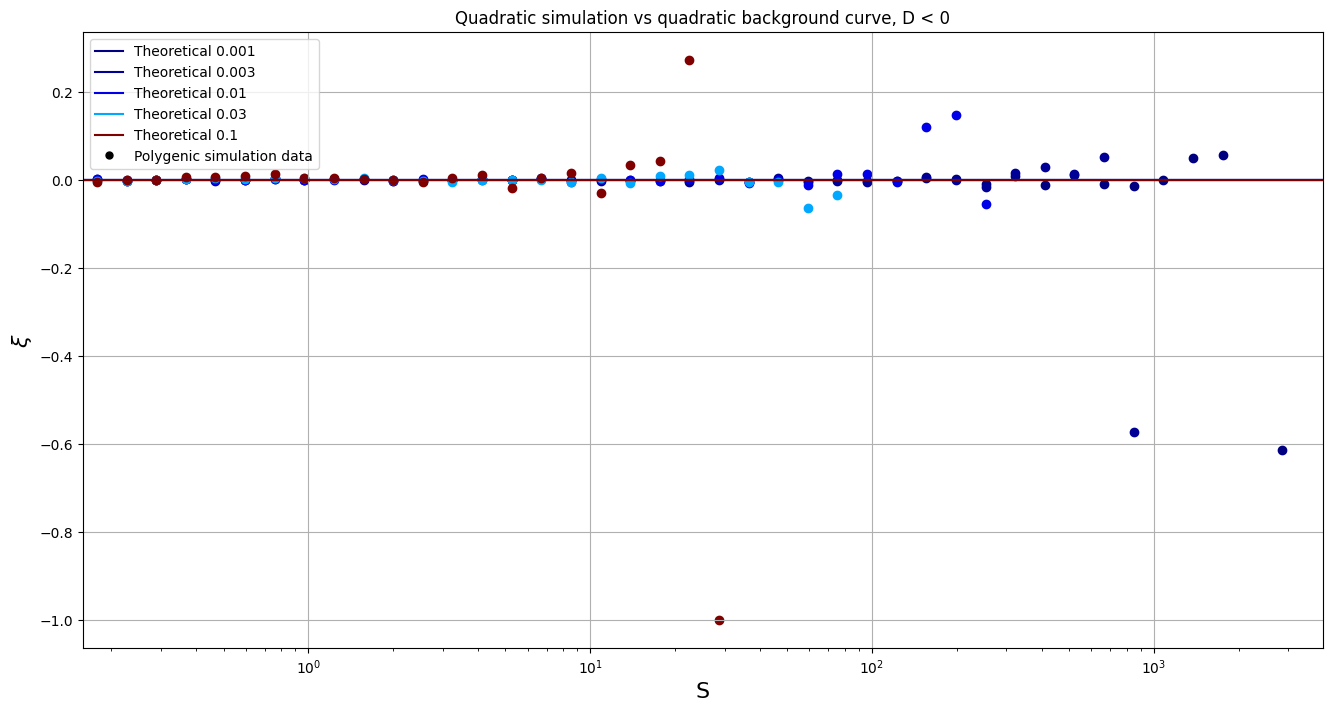

In [21]:
from matplotlib.lines import Line2D

cmap = plt.cm.jet
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 40)

for MAF_thr in MAF_thr_values:
# #     corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    corr_set = [stab_corr(MAF_thr, sigma, False, True) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=f'Theoretical {MAF_thr}')

for i, ind in enumerate(corr_df_tot.index):
#     plt.plot(demog_pos.columns, demog_pos.loc[ind, :], label=f'Negative simulation MAF {ind}', color=cmap(norm(MAF_thr_values[i])))
    plt.scatter(corr_df_tot.columns, corr_df_tot.loc[ind, :], color=cmap(norm(MAF_thr_values[i])))


plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 16)
plt.ylabel("$\\xi$", fontsize = 16)

ax = plt.gca()
ax.set_xlim([10**(-0.8), 10**(3.6)])

plt.legend()
point = Line2D([0], [0], label='Polygenic simulation data', markersize=10, marker='.', markerfacecolor='k', markeredgecolor='k', linestyle='')
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([point])
plt.legend(handles=handles)

plt.title('Quadratic simulation vs quadratic background curve, D < 0')
plt.savefig('plots/quadsim_quadback_dneg.pdf')
plt.show()

### Comparison of polygenic background simulations vs simple quadratic effect size correlations

Our step here is to compare the alignment of the quadratic effect size correlation theory with the simulation results with polygenic background. The purpose is to show that the quadratic selection theory is insufficient for modeling effect size correlations for the polygenic background. 

In [3]:
# First, we load in our csv
from tqdm import tqdm

mypath = '/n/scratch/users/s/sjg319/sim_outputs/polygenic'
gz_files = [f for f in tqdm(listdir(mypath)) if isfile(join(mypath, f))]
beta_vals = pd.read_csv('betas_old.txt', header=None).to_numpy().squeeze()

new_labs = [2*20000*x**2 for x in beta_vals]


 13%|█▎        | 32295/255000 [00:31<03:16, 1135.52it/s]


 25%|██▌       | 64225/255000 [00:59<02:56, 1082.18it/s]


 38%|███▊      | 95651/255000 [01:28<02:17, 1158.81it/s]


 50%|████▉     | 127298/255000 [01:56<01:53, 1122.85it/s]


 62%|██████▏   | 159310/255000 [02:25<01:26, 1107.25it/s]


 75%|███████▍  | 190825/255000 [02:54<01:01, 1044.42it/s]


 87%|████████▋ | 220888/255000 [03:23<00:31, 1095.09it/s]


 99%|█████████▉| 253055/255000 [03:51<00:01, 1072.76it/s]


100%|██████████| 255000/255000 [03:53<00:00, 1092.78it/s]


In [4]:
corrs = pd.read_csv('dataframes/underdominant/corr_csv_pos_d.csv', index_col=0)
# corrs.iloc[:, -1] = -1
new_labs = [2*20000*float(x)**2 for x in corrs.columns]
corrs.columns = new_labs

drop = []
for x in corrs.columns:
    if np.sum(corrs[x] == 0) == len(corrs):
        drop.append(x)
        
corrs = corrs.drop(drop, axis=1)

for x in corrs.columns:
    for i in corrs.index:
        if corrs.loc[i, x] == 0:
            corrs.loc[i, x] = -1

100%|██████████| 5/5 [00:00<00:00,  7.47it/s]
5it [00:00, 359.07it/s]


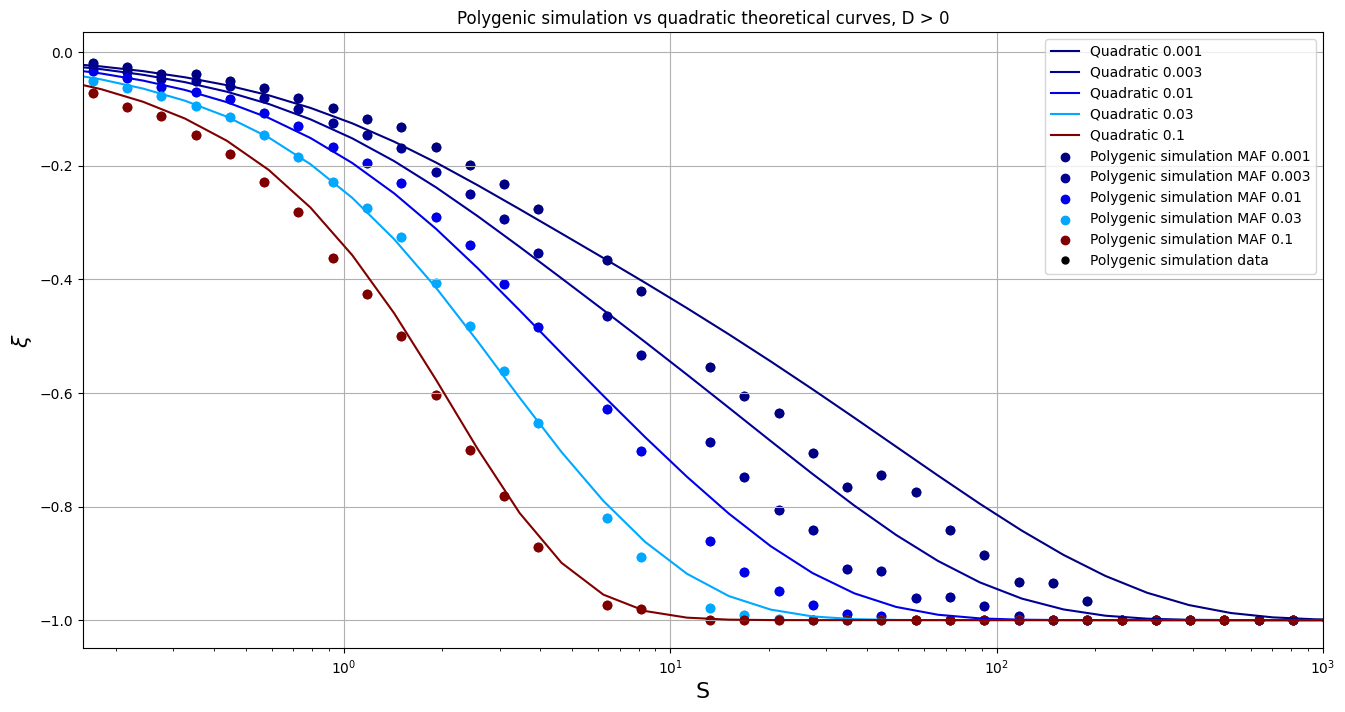

In [8]:
from matplotlib.lines import Line2D

cmap = plt.cm.jet
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 40)

for MAF_thr in tqdm(MAF_thr_values):
#     corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    corr_set = [stab_corr(MAF_thr, sigma, True) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=f'Quadratic {MAF_thr}')

for i, ind in tqdm(enumerate(corrs.index)):
    plt.scatter(corrs.columns/1.7, corrs.loc[ind, :], label=f'Polygenic simulation MAF {ind}', color=cmap(norm(MAF_thr_values[i])))
    plt.scatter(corrs.columns/1.7, corrs.loc[ind, :], color=cmap(norm(MAF_thr_values[i])))


plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 16)
plt.ylabel("$\\xi$", fontsize = 16)

ax = plt.gca()
ax.set_xlim([10**(-0.8), 10**(3)])

plt.legend()
point = Line2D([0], [0], label='Polygenic simulation data', markersize=10, marker='.', markerfacecolor='k', markeredgecolor='k', linestyle='')
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([point])
plt.legend(handles=handles)

plt.title('Polygenic simulation vs quadratic theoretical curves, D > 0')
# plt.savefig('plots/poly_sim_vs_quad_theory_pos_d.pdf')
plt.show()

# Dadi Simulator

In [3]:
import dadi
import pandas as pd
from dadi import PhiManip, Integration, Spectrum

xx = dadi.Numerics.default_grid(5000)
# We want to estimate phi for our given demography. First a 
# burn in period
phi = PhiManip.phi_1D(xx)
initial_pop = 14620
phi = Integration.one_pop(phi, xx, 100000, nu=initial_pop)

# Next, we want demography. Create a lambda function representing
# the population over time
populations = pd.read_csv('demo_Ns.txt', header=None).to_numpy().squeeze()
nu_func = lambda t : 2*populations[int(t)]
phi = Integration.one_pop(phi, xx, 999, nu=nu_func)

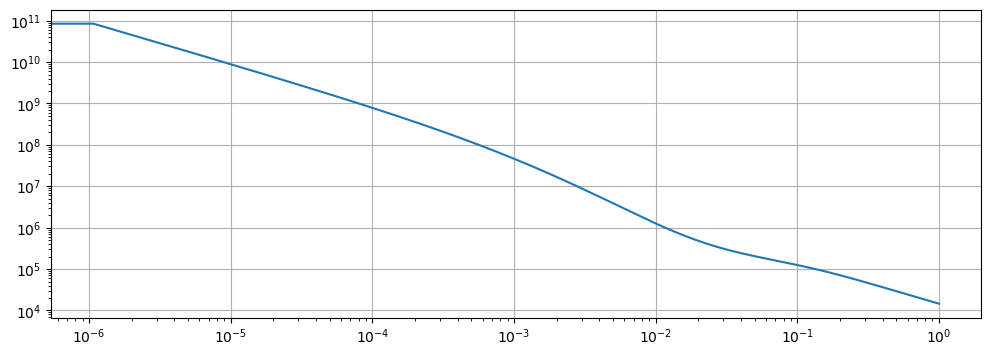

In [83]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(xx, phi)
plt.yscale("log")
plt.xscale("log")
plt.grid()
# plt.legend()
plt.show()

# dadi.Plotting.plot_1d_fs(fs_three_epoch)

# Demography

In [2]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join
import re

mypath='/n/scratch/users/s/sjg319/sim_outputs/recomb/10/underdom/'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Define the function that builds the dfs
def buildDF(site_1, gz_files):
    pattern = re.compile(f'{site_1}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    df_list = [pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip') for file in specified_files]
    sim_df = pd.concat(df_list)

    return sim_df

<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_26704/3505412583.py:10: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'{site_1}_[0-9]+\.txt\.gz')


In [2]:
import numpy as np

mypath='/n/scratch/users/s/sjg319/sim_outputs/demography'

# Build the dataframe
df_list = [pd.read_csv(f'{mypath}/demography_selec_0_{i}.txt.gz', sep='\t', compression='gzip') for i in np.arange(1, 1001)]
sim_df = pd.concat(df_list)

In [86]:
def windowSmoothing(vec, w_size):
    smoothed = vec

    for i in range(len(vec) - 2*w_size):
        smoothed[i+w_size] = np.mean(vec[(i+w_size): (i+2*w_size)])

    return smoothed

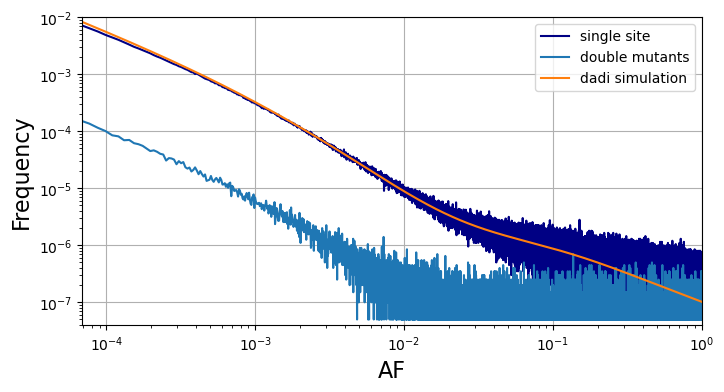

In [10]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])

# vs_1 = windowSmoothing(vs_1, 50)
# vs_2 = windowSmoothing(vs_2, 50)
# vs_3 = windowSmoothing(vs_3, 50)

ks_1 = ks_1 / sim_df.iloc[0, :].sum()
ks_2 = ks_2 / sim_df.iloc[0, :].sum()
ks_3 = ks_3 / sim_df.iloc[0, :].sum()

# plt.plot(np.array(ks_2), np.array(vs_2)/len(sim_df), label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/len(sim_df), label="single site", color=cmap(1))
plt.plot(np.array(ks_3), np.array(vs_3)/len(sim_df), label="double mutants")
# plt.plot(x, y, label="hyperbolic expectation")

# We rescale so that integrals are about the same
phi_int = 0
for i in range(10, (len(phi) - 1)):
    phi_int += phi[i]*(xx[i+1] - xx[i])

sim_int = 0
scale = np.array(vs_2)/len(sim_df)
for i in range(1, (len(ks_2) - 1)):
    sim_int += scale[i] * (ks_2[i+1] - ks_2[i])

phi_scale = sim_int * phi / phi_int


plt.plot(xx, phi_scale, label='dadi simulation')

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

cutoff = 1/14620
ax = plt.gca()
ax.set_xlim([cutoff, 1])
ax.set_ylim([10**(-7.4), 10**(-2)])

plt.savefig('plots/dadi_demography_plot.pdf')
plt.show()

# Recombination

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
from matplotlib.cm import get_cmap
cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

# Load in required values
beta_vals = pd.read_csv('betas_old.txt', header=None).to_numpy().squeeze()

/tmp/ipykernel_55001/2067563992.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


In [4]:
s_vals = [20000 * x**2 for x in beta_vals]
s_vals

[0.10000018089800002,
 0.359380724402,
 1.291549134402,
 2.0,
 4.64158652445,
 16.681007136098003,
 32.0,
 59.948424933282,
 98.00000000000001,
 215.443462544928]

In [5]:
from os import listdir
from os.path import isfile, join
import re

mypath='/n/scratch/users/s/sjg319/sim_outputs/recomb/'
# gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# recomb_vals = ["0.00001", "0.0001", "0.001", "0.01", "0.1"]
recomb_vals = ["1", "10", "30", "100", "300", "1000"]
MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
selec_types = ['underdom']

dfs = {}
for selec in selec_types:
    for recomb in recomb_vals:
        dfs[(selec, recomb, 'pos')] = []
        dfs[(selec, recomb, 'tot')] = []
        dfs[(selec, recomb, 'num')] = []

# gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Define the function that builds the dfs
def buildDF(site_1, gz_files, path):
    pattern = re.compile(f'old_{site_1}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    df_list = []
    for file in specified_files:
        try:
            df_list.append(pd.read_csv(path + f'/{file}', sep='\t', compression='gzip'))
        except:
            pass

    sim_df = pd.concat(df_list)

    return sim_df

In [6]:
from scipy.stats import pearsonr
import re

def createCorrelationMats(gz_files, MAF_thr_values, path, calc_variance=False):
    corr_df_pos = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
    corr_df_tot = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
    counts = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
    for site in np.arange(len(beta_vals)):
            print(f'starting site {site}')
            try:
                sim_df = buildDF(site, gz_files, path)
                sim_df[['N00', 'N01', 'N10', 'N11']] /= 20000
                for i, MAF_thr in enumerate(MAF_thr_values):
                    try:
                        # For the D > 0 case
                        sub_df_pos = sim_df[(sim_df['N11']) > MAF_thr]
                        
                        # Step 2, calculate the correlation and store
                        r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])
                        corr_df_pos.iloc[i, site] = r[0]
                        # sample_df.iloc[i, site] = len(sub_df)
                        if calc_variance:
                            counts.iloc[i, site] = len(sub_df_pos['beta_1'])
                    except:
                        print(f'missed D > 0 for site {site}, {MAF_thr}')

                    # try:
                    #     # For the total case
                    #     sub_df_tot = sim_df[(sim_df['N01'] + sim_df['N11']) > MAF_thr]
                    #     sub_df_tot = sub_df_tot[(sub_df_tot['N10'] + sub_df_tot['N11']) > MAF_thr]

                    #     r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])
                    #     corr_df_tot.iloc[i, site] = r[0]
                    # except:
                    #     print(f'missed all D for site {site}, {MAF_thr}')
            except: 
                print(f'couldnt build {site}')
                remove.append(site)

    return corr_df_pos, corr_df_tot, counts

In [7]:
recomb = "0.1"
selec = 'underdom'
tot_path = f'{mypath}{recomb}/{selec}/'
gz_files = [f for f in listdir(tot_path) if isfile(join(tot_path, f))]
df = buildDF(1, gz_files, tot_path)

df

FileNotFoundError: [Errno 2] No such file or directory: '/n/scratch/users/s/sjg319/sim_outputs/recomb/0.1/underdom/'

In [7]:
for recomb in recomb_vals:
    for selec in selec_types: 
        print(f'{recomb} {selec}')
        tot_path = f'{mypath}{recomb}/{selec}/'
        gz_files = [f for f in listdir(tot_path) if isfile(join(tot_path, f))]
        corr_df_pos, corr_df_tot, num_pos = createCorrelationMats(gz_files, MAF_thr_values, tot_path, calc_variance=True)
        corr_df_pos.to_csv(f'dataframes/recomb_{recomb}_{selec}_pos.csv', sep='\t')
        num_pos.to_csv(f'dataframes/num_pos/num_pos_{recomb}.csv', sep='\t')
        # corr_df_tot.to_csv(f'dataframes/recomb_{recomb}_{selec}_tot.csv', sep='\t')

        # corr_df_pos = pd.read_csv(f'dataframes/recomb_{recomb}_{selec}_pos.csv', sep='\t', index_col=0)
        dfs[(selec, recomb, 'pos')] = corr_df_pos
        dfs[(selec, recomb, 'num')] = num_pos

1 underdom
starting site 0
starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
starting site 6
starting site 7
starting site 8
starting site 9
10 underdom
starting site 0
starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
starting site 6
starting site 7
starting site 8
starting site 9
30 underdom
starting site 0
starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
starting site 6


/tmp/ipykernel_20250/1132488909.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])


starting site 7
missed D > 0 for site 7, 0.1
starting site 8
missed D > 0 for site 8, 0.1
starting site 9


/tmp/ipykernel_20250/1132488909.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])


missed D > 0 for site 9, 0.1
100 underdom
starting site 0
starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
missed D > 0 for site 5, 0.1
starting site 6
missed D > 0 for site 6, 0.03
missed D > 0 for site 6, 0.1
starting site 7
missed D > 0 for site 7, 0.03
missed D > 0 for site 7, 0.1
starting site 8
missed D > 0 for site 8, 0.03
missed D > 0 for site 8, 0.1
starting site 9
missed D > 0 for site 9, 0.03
missed D > 0 for site 9, 0.1
300 underdom
starting site 0
starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
missed D > 0 for site 5, 0.03
missed D > 0 for site 5, 0.1
starting site 6


/tmp/ipykernel_20250/1132488909.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])


missed D > 0 for site 6, 0.03
missed D > 0 for site 6, 0.1
starting site 7
missed D > 0 for site 7, 0.01
missed D > 0 for site 7, 0.03
missed D > 0 for site 7, 0.1
starting site 8
missed D > 0 for site 8, 0.01
missed D > 0 for site 8, 0.03
missed D > 0 for site 8, 0.1
starting site 9
missed D > 0 for site 9, 0.01
missed D > 0 for site 9, 0.03
missed D > 0 for site 9, 0.1
1000 underdom
starting site 0
starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
missed D > 0 for site 5, 0.03
missed D > 0 for site 5, 0.1
starting site 6
missed D > 0 for site 6, 0.01
missed D > 0 for site 6, 0.03
missed D > 0 for site 6, 0.1
starting site 7


/tmp/ipykernel_20250/1132488909.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])


missed D > 0 for site 7, 0.01
missed D > 0 for site 7, 0.03
missed D > 0 for site 7, 0.1
starting site 8
missed D > 0 for site 8, 0.003
missed D > 0 for site 8, 0.01
missed D > 0 for site 8, 0.03
missed D > 0 for site 8, 0.1
starting site 9
missed D > 0 for site 9, 0.003
missed D > 0 for site 9, 0.01
missed D > 0 for site 9, 0.03
missed D > 0 for site 9, 0.1


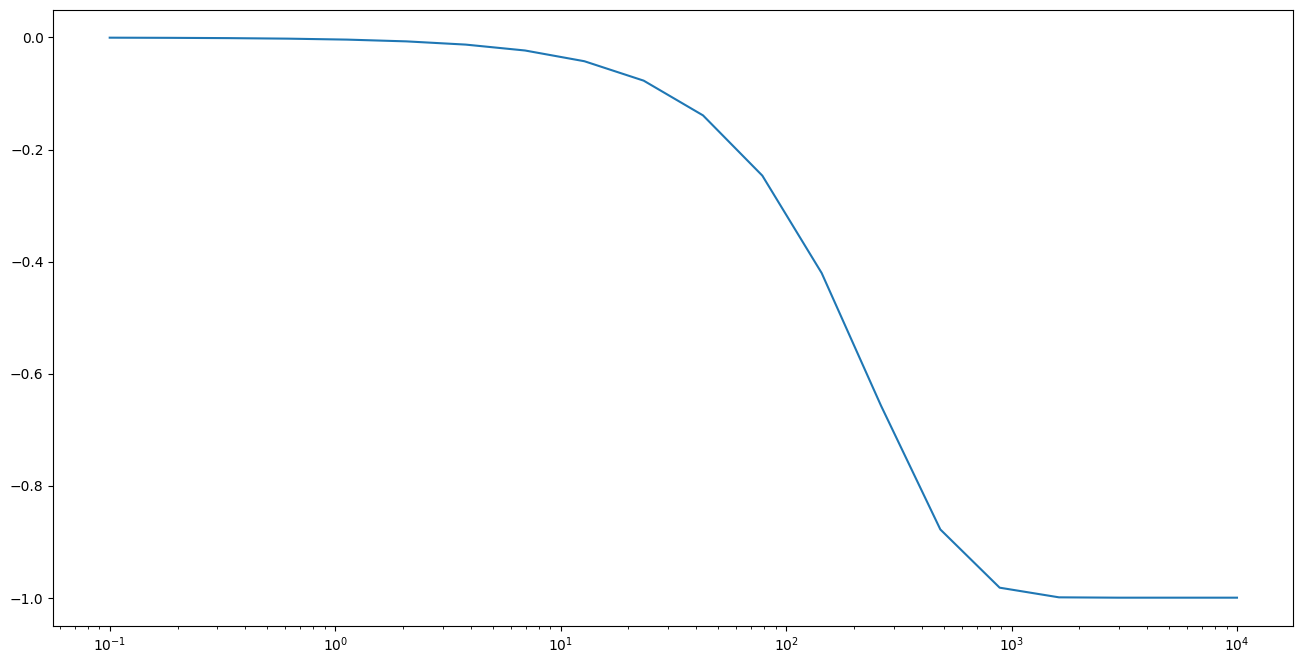

In [22]:
import scipy as sp
from scipy.special import erf
from scipy.integrate import quad

def sfs_ud_params_sigma(xx, theta, S_ud):
    """Calculate the intensity of the site frequency
    spectrum under underdominant selection."""
    S_ud = np.abs(S_ud) + 1e-8
    return (theta*np.exp(-S_ud*xx*(1-xx))/(xx*(1-xx))*
                 (1 + erf(np.sqrt(S_ud)*(0.5-xx))/
                 erf(np.sqrt(S_ud)/2)))
    
def poly_prob(yy, theta, sigma):
    return sp.integrate.quad(sfs_ud_params_sigma, yy, 1-yy, args=(theta, sigma))[0]
ud_burden = lambda xx, theta, sigma: xx*sfs_ud_params_sigma(xx, theta, sigma)

def ex_burden(sigma, theta):
    return sp.integrate.quad(ud_burden, 0, 1, args=(theta, sigma))[0]
    
def sing_eff_xi(yy, theta, sigma, pos_D_bool=False):
    P_0 = poly_prob(yy, theta, 0)
    P_4S = poly_prob(yy, theta, 4*sigma)
    if not pos_D_bool:
        P_S = poly_prob(yy, theta, sigma)
        xx = ex_burden(sigma, theta)
        return xx * (P_4S - P_0) / (xx * (P_4S + P_0) + P_S**2)
    return (P_4S - P_0)/(P_4S + P_0)
    
def pi_model_xi(yy, theta, sigma, pi, pos_D_bool=True):
    P_0 = poly_prob(yy, theta, 0)
    P_S = poly_prob(yy, theta, sigma)
    P_4S = poly_prob(yy, theta, 4*sigma)
    xx_S = ex_burden(sigma, theta)
    xx_0 = ex_burden(0, theta)
    nom = (1 - pi)*xx_S*(P_4S - P_0)
    if pos_D_bool:
        den = pi*(xx_0 + xx_S)*P_S + (1 - pi)*xx_S*(P_4S + P_0)
    else:
        den = pi*(P_0*P_S + (xx_0 + xx_S)*P_S) + (1 - pi)*(P_S**2 + xx_S*(P_4S + P_0))
    return nom/den
    
def rho_xi(yy, theta, sigma, rho, pos_D_bool=True):
    xx_S = ex_burden(sigma, theta)
    P_R = poly_prob(yy, theta, rho)
    P_4S_R = poly_prob(yy, theta, 4*sigma + rho)
    nom = xx_S*(P_4S_R - P_R) + (xx_S**2)*(P_4S_R - P_R)
    if pos_D_bool:
        den = xx_S*(P_4S_R + P_R) + (xx_S**2)*(P_4S_R + P_R)
    else:
        P_S = poly_prob(yy, theta, sigma)
        den = P_S**2 + xx_S*(P_4S_R + P_R) + (xx_S**2)*(P_4S_R + P_R)
    return nom/den

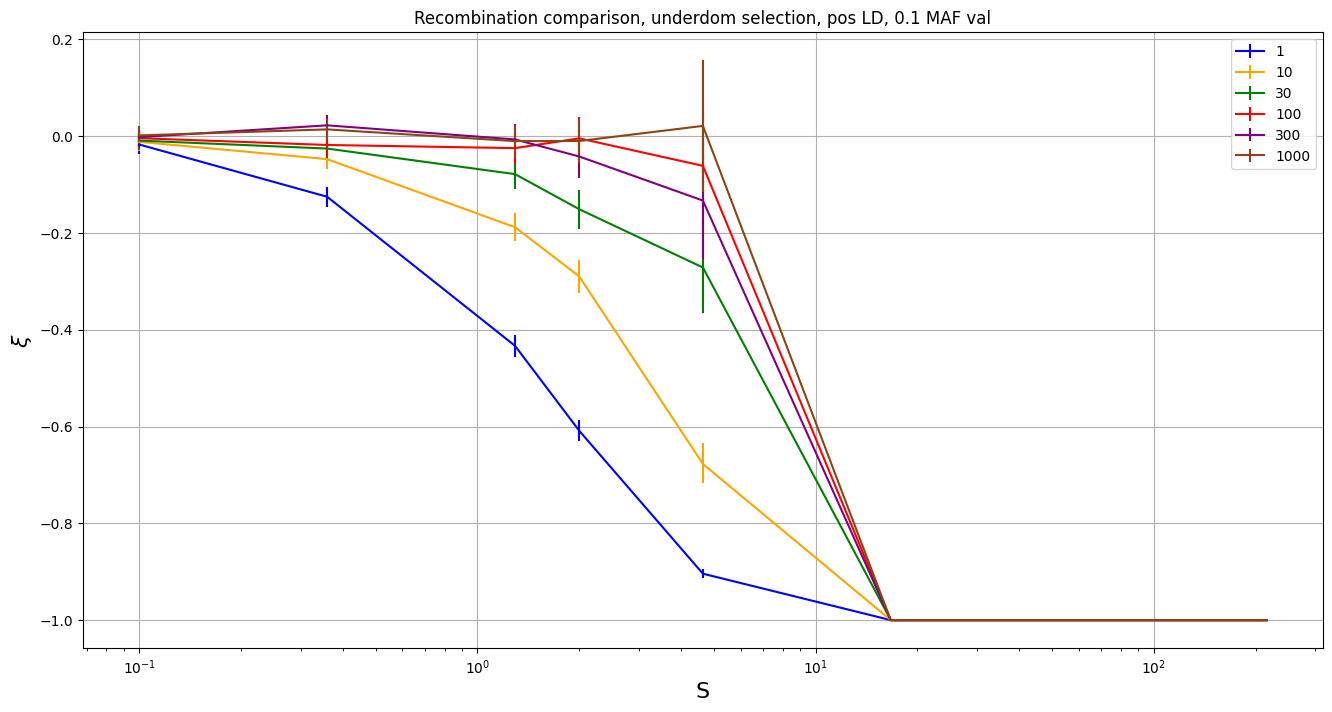

In [67]:
import matplotlib.colors as mcolors

selec = 'underdom'
linkage = 'pos'
MAF = 0.1
sigma_set = np.logspace(-1, 2.5, 20)
colors = ['#0000FF', '#FFA500', '#008000', '#FF0000', '#800080', '#8B4513']  
cmap = mcolors.ListedColormap(colors)

for i, recomb in enumerate(recomb_vals):
    df = dfs[(selec, recomb, linkage)].replace(0.0, -1)
    df.columns = s_vals

    # Calculate the errorbar with the Fisher transform
    num_vals = dfs[(selec, recomb, 'num')]
    errors = np.sqrt(1/(num_vals - 3)).loc[MAF, :].to_numpy()
    fisher_transform = np.arctanh(df.loc[MAF, :]).to_numpy()
    upper = np.tanh(fisher_transform + 1.96 * errors)
    lower = np.tanh(fisher_transform - 1.96 * errors)
    total_errors = np.zeros((2, len(upper)))
    total_errors[0, :] = df.loc[MAF, :] - lower 
    total_errors[1, :] = upper - df.loc[MAF, :]
    corr_set = [rho_xi(MAF, .01, sigma, int(recomb)) for sigma in sigma_set]
    # plt.plot(sigma_set, corr_set, color=colors[i])
    plt.errorbar(df.columns, df.loc[MAF, :], yerr=total_errors, label=f'{recomb}', color=colors[i])

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 16)
plt.ylabel("$\\xi$", fontsize = 16)

ax = plt.gca()
plt.title(f'Recombination comparison, {selec} selection, {linkage} LD, {MAF} MAF val')
plt.legend()

# plt.savefig(f'plots/recomb_{linkage}_LD_10_MAF.pdf')
plt.show()

In [50]:
# Let's try to plot the 13/18 rule, first get the neutral cases
mypath='/n/scratch/users/s/sjg319/sim_outputs/recomb/'
corr_df = pd.DataFrame(0.0, index=[1], columns=recomb_vals)

for recomb in recomb_vals:
    print(f'{recomb}')
    tot_path = f'{mypath}{recomb}/underdom/'
    gz_files = [f for f in listdir(tot_path) if isfile(join(tot_path, f))]
    # sim_df = buildDF('a', gz_files, tot_path)
    # sim_df.to_csv(f'/n/data2/hms/dbmi/sunyaev/lab/sgandhi/effect_size/recomb/neutral_{recomb}.csv', sep='\t')
    sim_df = pd.read_csv(f'/n/data2/hms/dbmi/sunyaev/lab/sgandhi/effect_size/recomb/neutral_{recomb}.csv', sep='\t')
    sim_df[['N00', 'N01', 'N10', 'N11']] /= 20000
    
    p_1 = sim_df['N10'] + sim_df['N11']
    p_2 = sim_df['N01'] + sim_df['N11']
    D_sq = (sim_df['N11'] - p_1*p_2)**2
    denom = p_1*(1-p_1)*p_2*(1-p_2)
    corr_df[recomb] = D_sq.mean()/denom.mean()

1


FileNotFoundError: [Errno 2] No such file or directory: '/n/data2/hms/dbmi/sunyaev/lab/sgandhi/effect_size/recomb/neutral_1.csv'

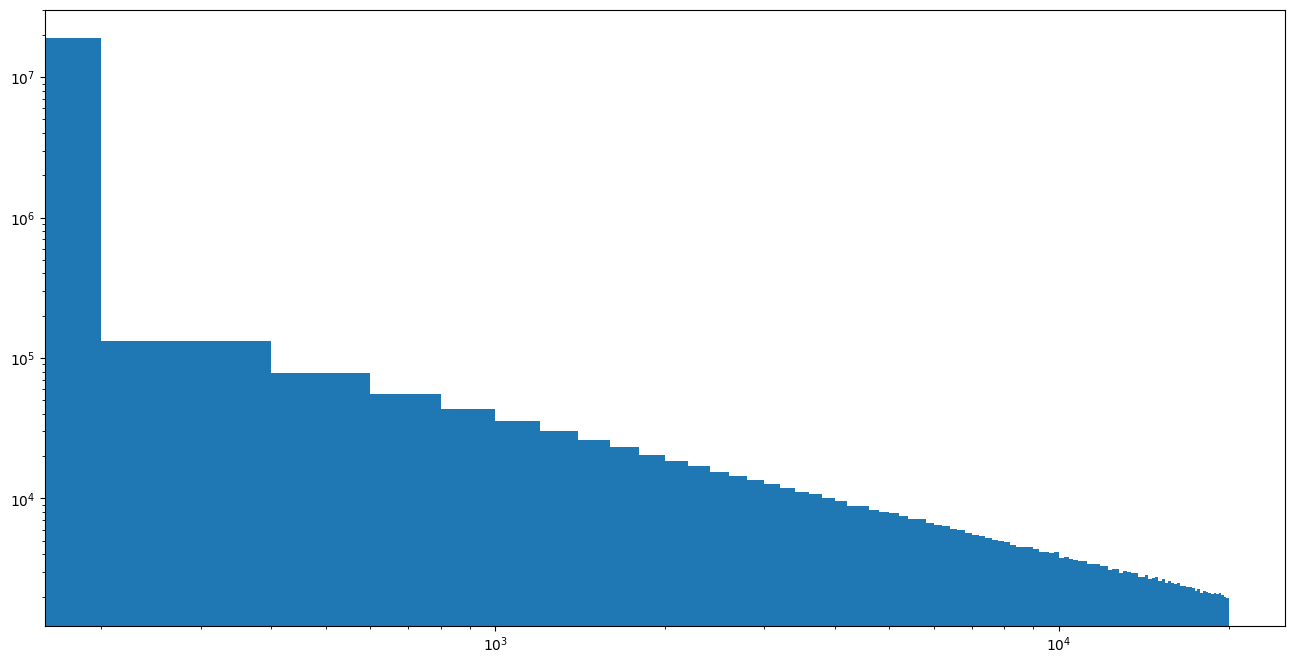

In [9]:
plt.hist((sim_df['N01'] + sim_df['N11'])*20000, bins=100)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [47]:
# Calculate the 13/18 rule
t = [float(x) for x in recomb_vals]
rule = [(x + 10)/(x**2 + 13*x + 22) for x in t]
rule

[0.3055555555555556,
 0.07936507936507936,
 0.03048780487804878,
 0.00971559795089207,
 0.003300611145418539,
 0.0009970168466232718]

In [48]:
# corr_df.loc[2] = rule
# corr_df = corr_df.T

# corr_df = corr_df.rename({1: 'Simulation', 2: 'Theory'})
corr_df

NameError: name 'corr_df' is not defined

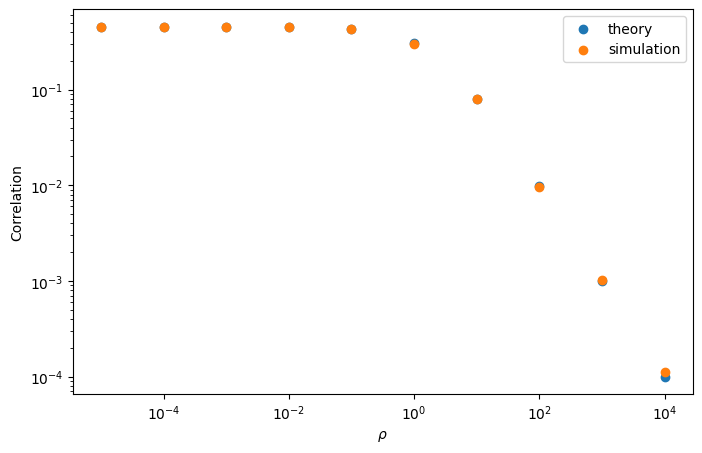

In [33]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(t, rule, label='theory')
plt.scatter(t, corr_df[1], label='simulation')
plt.legend()
plt.xscale("log")
plt.yscale('log')
plt.xlabel(r"$\rho$")
plt.ylabel('Correlation')
plt.savefig(f"plots/recombination_theory_vs_simulation.pdf")

plt.show()

# gVAMP data analysis

In [1]:
import pandas as pd

# Load in files
# LoF = pd.read_csv('/n/data2/hms/dbmi/sunyaev/lab/emkoch/popgen_SPEC/gVAMP/HT_WGS_LoF.csv.gz', compression='gzip')
# SNV = pd.read_csv('/n/data2/hms/dbmi/sunyaev/lab/emkoch/popgen_SPEC/gVAMP/HT_WGS_SNV.csv.gz', compression='gzip')

In [4]:
# annotations
import requests

# Define the URL
url = "https://api.genohub.org/v1/variants/19-44908822-C-T"

# Send a GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Process the JSON response (if applicable)
    data = response.json()
    print(data)  # Print or process the data as needed
else:
    print(f"Error: {response.status_code} - {response.text}")


{'variant_vcf': '19-44908822-C-T', 'chromosome': '19', 'position': '44908822', 'bravo_an': 264690, 'bravo_ac': 20678, 'bravo_af': 0.0781216, 'filter_status': 'PASS', 'rsid': 'rs7412', 'genecode_comprehensive_category': 'exonic', 'genecode_comprehensive_info': 'APOE', 'genecode_comprehensive_exonic_category': 'nonsynonymous SNV', 'genecode_comprehensive_exonic_info': 'APOE:ENST00000446996.5:exon4:c.C526T:p.R176C,APOE:ENST00000434152.5:exon4:c.C604T:p.R202C,APOE:ENST00000252486.9:exon4:c.C526T:p.R176C,APOE:ENST00000425718.1:exon3:c.C526T:p.R176C,', 'ucsc_info': 'ENST00000252486.8,ENST00000425718.1,ENST00000434152.5,ENST00000446996.5', 'ucsc_exonic_info': 'ENST00000446996.5:ENST00000446996.5:exon4:c.C526T:p.R176C,ENST00000434152.5:ENST00000434152.5:exon4:c.C604T:p.R202C,ENST00000425718.1:ENST00000425718.1:exon3:c.C526T:p.R176C,ENST00000252486.8:ENST00000252486.8:exon4:c.C526T:p.R176C,', 'polyphen2_hdiv_score': 1, 'polyphen2_hvar_score': 1, 'mutation_taster_score': 0.93, 'mutation_assessor

In [5]:
# Get the correct data entries, particularly the genecode ones
keys = []
for key in list(data.keys()):
    if 'genecode' in key:
        keys.append(key)
        SNV[key] = ""

In [47]:
# Now we do the genecode annotations
for i in range(len(SNV)):
    if i % 1000 == 0:
        print(i)

    mut_1 = SNV.loc[i, 'new_A1']
    mut_2 = SNV.loc[i, 'new_A2']
    bp = SNV.loc[i, 'bp']
    chromosome = SNV.loc[i, 'CHR']
    url = f"https://api.genohub.org/v1/variants/{chromosome}-{bp}-{mut_1}-{mut_2}"
    
    # Send a GET request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Process the JSON response (if applicable)
        data = response.json()
        for key in keys:
            SNV.loc[i, key] = data[key]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000


KeyboardInterrupt: 

In [10]:
i = 1000

mut_1 = SNV.loc[i, 'new_A1']
mut_2 = SNV.loc[i, 'new_A2']
bp = SNV.loc[i, 'bp']
chromosome = SNV.loc[i, 'CHR']
url = f"https://api.genohub.org/v1/variants/{chromosome}-{bp}-{mut_1}-{mut_2}"

requests.get(url).json()

{'message': 'your requested item could not be found'}

In [2]:
# Load in all of our csv files
from os import listdir
from os.path import isfile, join
import re

mypath='/n/scratch/users/s/sjg319/dataframes/genecode_annots/'
csv_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [31]:
# Append the relevant information
num_per = 16854
for i, file in enumerate(csv_files):
    if i % 100 == 0:
        print(i)

    df = pd.read_csv(f'{mypath}{file}', sep='\t', index_col=0).fillna(0)
    index = int(file.split('.')[0])
    SNV.loc[(num_per*(index-1)):(num_per*index), keys] = df

0
100
200
300
400
500
600
700
800
900


In [43]:
# Finally, save the file
SNV.to_csv(f'{mypath}full_annots_SNV.csv', sep='\t')

KeyboardInterrupt: 

In [ ]:
# Loading in from the downloaded databases
mypath = '/n/data2/hms/dbmi/sunyaev/lab/data/annotations/favor'
pd.read_csv(f'{mypath}/6170506', compression='gzip', encoding='ISO-8859-1')
# import gzip

# f = gzip.open(f'{mypath}/6170506', 'rb')
# file_content = f.read()
# print(file_content)

# Montgomery dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

variant_mat = pd.read_csv('NIHMS1809843-supplement-TableS4.txt', sep='\t')
variant_mat

,Pool,VarID,geneID,chrom,pos,strand,ref,alt,haploFlag,cDNA1_ref,...,padj_expr,baseMean_allele,log2FoldChange_allele,lfcSE_allele,stat_allele,pvalue_allele,padj_allele,inTewhey,tewheyExpressionGoldSet,tewheyAlleleGoldSet
0,1KGControl,var1000,NaN,chr11,73465929,pos,CA,C,Base,0,...,7.076564e-01,173.952151,0.330047,1.680821,0.196360,0.844328,0.939161,no,No,No
1,1KGControl,var1001,NaN,chr11,73466223,pos,A,G,Base,1741,...,5.923950e-01,1024.523507,-0.361576,0.460671,-0.784890,0.432518,0.698926,no,No,No
2,1KGControl,var1002,NaN,chr11,73468258,pos,A,G,Base,1268,...,7.146086e-01,438.444420,-1.065131,0.544247,-1.957071,0.050339,0.218409,no,No,No
3,1KGControl,var1003,NaN,chr11,73481153,pos,G,A,Base,1907,...,1.958462e-20,604.256422,-0.247029,0.460381,-0.536575,0.591561,0.806836,no,No,No
4,1KGControl,var1004,NaN,chr11,73484717,pos,C,T,Base,3232,...,2.790149e-01,2426.231864,-0.073055,0.249249,-0.293100,0.769446,0.904274,no,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30517,1KGTest,var992,+,chr1,41567455,pos,C,CAT,Base,377,...,9.246677e-01,241.233033,0.651763,0.779439,0.836195,0.403045,0.675883,no,No,No
30518,Sabeti,var9935,+,chr6,160502460,pos,A,T,Base,2070,...,3.013210e-04,1449.453398,-0.443202,0.376534,-1.177057,0.239173,0.516335,yes,Yes,No
30519,1KGTest,var9957,-,chr6,167401208,neg,T,C,Base,460,...,6.748732e-01,251.343303,-1.280885,0.649805,-1.971184,0.048703,0.214349,no,No,No
30520,1KGTest,var9997,-,chr7,623991,neg,C,T,Base,1172,...,1.746508e-03,707.187840,0.095048,0.392100,0.242407,0.808465,0.923087,no,No,No


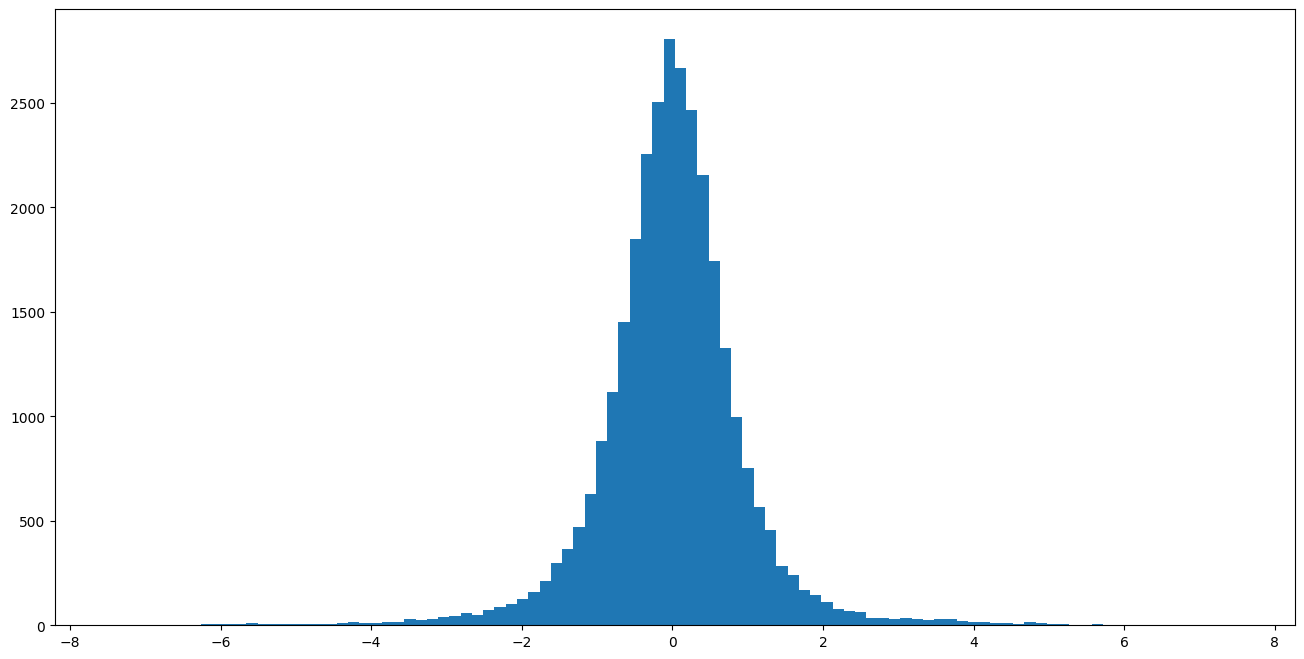

In [3]:
# Very basic histogram of the effect sizes
plt.hist(variant_mat['log2FoldChange_allele'], bins=100)
plt.show()

In [25]:
# # Let's partition the mutations into nonoverlapping sets based on 1000bp gaps
# gap = 1000
# chr_df = variant_mat[variant_mat['chrom'] == 'chr11'].sort_values('pos')

# partitions = {}
# bookmark = -10000
# group = 0
# for i in range(len(chr_df)):
#     if chr_df['pos'].iloc[i] - bookmark > gap:
#         # Create a new group
#         bookmark = chr_df['pos'].iloc[i]
#         group += 1
#         partitions[group] = []

#     partitions[group].append(i)

In [4]:
# Let's look at variants where there are more than one copy
chromosomes = list(set(variant_mat['chrom']))

# Let's remove any doubles or something along those lines
variant_mat = variant_mat[[len(x) == 1 for x in variant_mat['ref']]]
variant_mat = variant_mat[[len(x) == 1 for x in variant_mat['alt']]]

chr_repeats = {}
for chrom in chromosomes:
    chr_df = variant_mat[variant_mat['chrom'] == chrom].sort_values('pos')
    repeats = []
    seen = []
    for i in range(len(chr_df)):
        if chr_df['VarID'].iloc[i] in seen:
            repeats.append(chr_df['VarID'].iloc[i])
        else:
            seen.append(chr_df['VarID'].iloc[i])

    chr_repeats[chrom] = repeats

chr_repeats

{'chr21': [],
 'chr9': [],
 'chr16': [],
 'chr17': ['var24559',
  'var24560',
  'var24586',
  'var24585',
  'var24594',
  'var24593',
  'var24679',
  'var24680',
  'var24689',
  'var24698',
  'var24697',
  'var24749',
  'var24750',
  'var24776',
  'var24775',
  'var24777',
  'var24778',
  'var24814',
  'var24815',
  'var24816',
  'var24848',
  'var24847',
  'var24964',
  'var24963',
  'var24988',
  'var24987',
  'var24989',
  'var25043',
  'var25090',
  'var25091',
  'var25092',
  'var25099',
  'var25135',
  'var25136',
  'var25177',
  'var25178',
  'var25263',
  'var25262',
  'var25272',
  'var25273',
  'var25349',
  'var25348',
  'var25390',
  'var25391',
  'var25399',
  'var25401',
  'var25400',
  'var25409',
  'var25408',
  'var25473',
  'var25483',
  'var25482',
  'var25577',
  'var25623',
  'var25622',
  'var25680',
  'var25681',
  'var25738',
  'var25779',
  'var25781',
  'var25780',
  'var25844',
  'var25883',
  'var25929',
  'var25928',
  'var25980',
  'var25981',
  'var25996'

/tmp/ipykernel_37920/4080292975.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16219,29807,' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  beta_df.loc[len(beta_df), :] = beta_vals


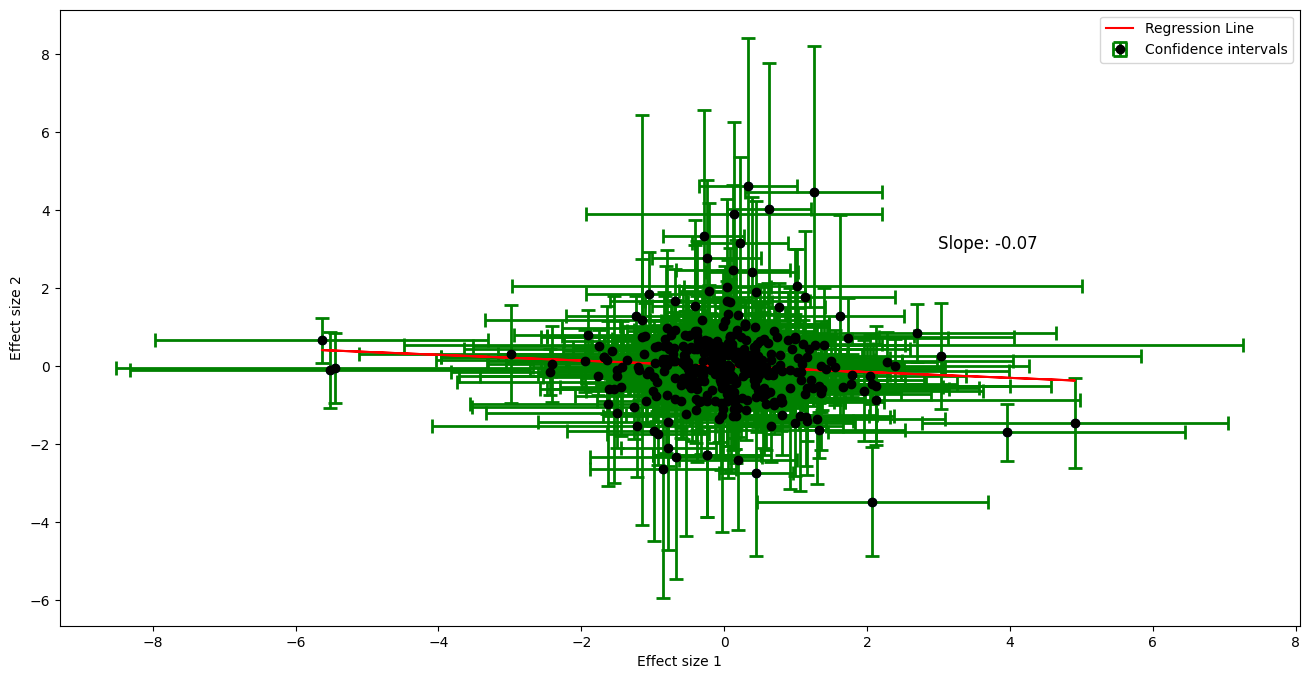

In [38]:
# Let's get the log2FC for both of the variants and plot them
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats

beta_df = pd.DataFrame(0.0, index=[], columns=['beta1', 'beta2', 'p1', 'p2', 'CI1', 'CI2', 'weight', 'varInd'])

chr_df = variant_mat.sort_values('pos')

for chrom in chr_repeats.keys():
    for var in chr_repeats[chrom]:
        subset = chr_df[chr_df['VarID'] == var]
        id_str = ''
        for x in subset.index:
            id_str += str(x) + ','
        beta_vals = [subset['log2FoldChange_allele'].iloc[0], subset['log2FoldChange_allele'].iloc[1], 
                     subset['pvalue_allele'].iloc[0], subset['pvalue_allele'].iloc[1], 0, 0, 0, id_str]
        beta_df.loc[len(beta_df), :] = beta_vals

plt.scatter(beta_df['beta1'], beta_df['beta2'])

# Let's create confidence intervals for each point in each direction
z_1 = np.abs(stats.norm.ppf(beta_df['p1']/2))
SE1 = 1.96*np.abs(beta_df['beta1'] / z_1)
beta_df['CI1'] = SE1

z_2 = np.abs(stats.norm.ppf(beta_df['p2']/2))
SE2 = 1.96*np.abs(beta_df['beta2'] / z_2)
beta_df['CI2'] = SE2

# Finally, calculate weights for the weighted linear regression
beta_df['weight'] = 1/np.sqrt(SE1**2 + SE2**2)

plt.errorbar(beta_df['beta1'], beta_df['beta2'], xerr=SE1, yerr=SE2, fmt='o', color='black', 
             ecolor='green', elinewidth=2, capsize=5, capthick=2, label='Confidence intervals')

x = beta_df['beta1'].to_numpy().reshape(-1, 1)
y = beta_df['beta2'].to_numpy().reshape(-1, 1)

# Weighted plot version
X_design = sm.add_constant(x)
model = sm.WLS(y, X_design, weights=beta_df['weight'])
results = model.fit()
intercept = results.params[0]
slope = results.params[1]
y_pred = intercept + slope * x

# # Nonweighted plot version
# model = LinearRegression()
# model.fit(x, y)
# slope = model.coef_[0][0]
# r_squared = model.score(x, y)
# y_pred = model.predict(x)

plt.plot(x, y_pred, color='red', label='Regression Line')
plt.text(3, 3, f'Slope: {slope:.2f}', fontsize=12, color='black')
# plt.text(2, 1.6, f'R^2: {r_squared:.2f}', fontsize=12, color='black')
plt.xlabel('Effect size 1')
plt.ylabel('Effect size 2')
plt.legend()
plt.show()

In [8]:
# Let's bootstrap a confidence interval for the slope
import random

calc_slope = slope
B = 5000 # number of iterations
sampled_slopes = []
for _ in range(B):
    # Resample the data
    x_new = []
    y_new = []
    for _ in range(len(x)):
        i = random.randint(0, len(x)-1)
        x_new.append(x[i].item())
        y_new.append(y[i].item())

    # Generate a slope
    x_new = np.array(x_new).reshape(-1, 1)
    y_new = np.array(y_new).reshape(-1, 1)
    
    X_design = sm.add_constant(x_new)
    model = sm.WLS(y_new, X_design, weights=beta_df['weight'])
    results = model.fit()
    intercept = results.params[0]
    slope = results.params[1]

    # Store the slope
    sampled_slopes.append(slope)

def slope_pval(x, y, calc_slope, weights):
    B = 1000 # number of iterations
    sampled_slopes = []
    for _ in range(B):
        # Resample the data
        x_new = []
        y_new = []
        for _ in range(len(x)):
            i = random.randint(0, len(x)-1)
            x_new.append(x[i].item())
            y_new.append(y[i].item())
    
        # Generate a slope
        x_new = np.array(x_new).reshape(-1, 1)
        y_new = np.array(y_new).reshape(-1, 1)
        
        X_design = sm.add_constant(x_new)
        model = sm.WLS(y_new, X_design, weights=weights)
        results = model.fit()
        intercept = results.params[0]
        slope = results.params[1]
    
        # Store the slope
        sampled_slopes.append(slope)

    p_value = np.mean(sampled_slopes >= calc_slope)
    return p_value

p_value = np.mean(sampled_slopes >= np.array(0))
p_value

0.1498

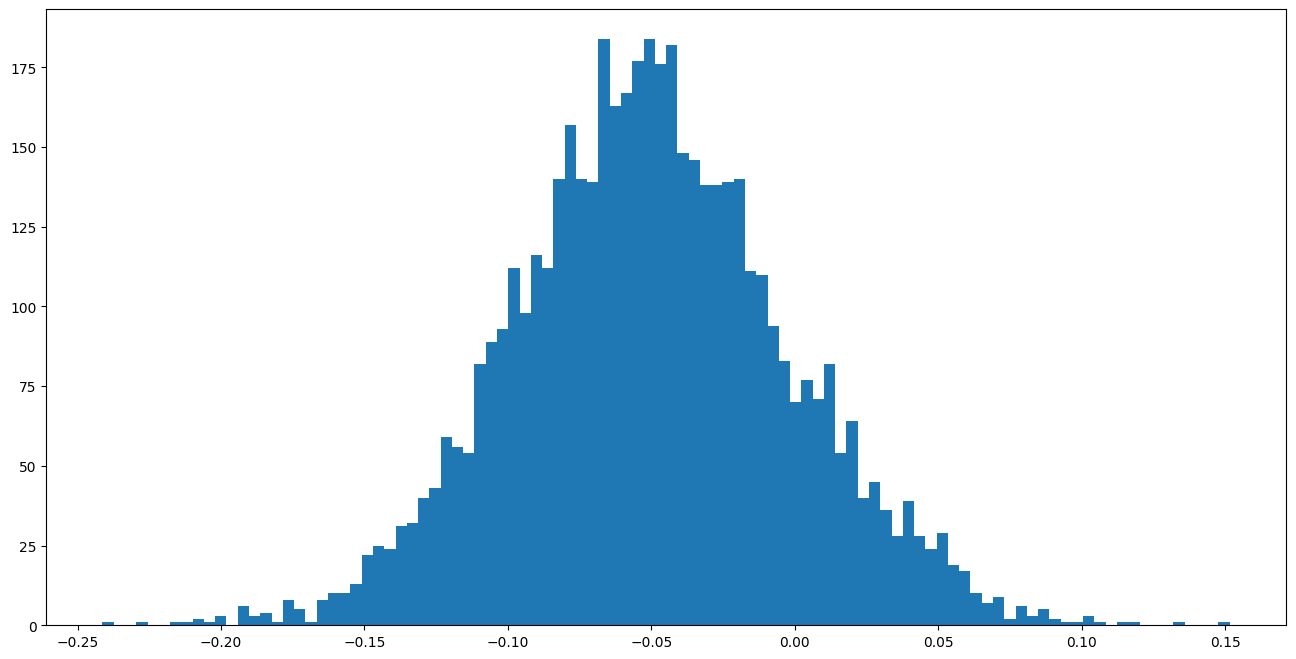

In [9]:
plt.hist(sampled_slopes, bins=100)
plt.show()

In [10]:
import requests
import os
import pandas as pd
import numpy as np

# Function to get rsID from Ensembl using genomic coordinates
def get_rsid(snp, hg="37"):
    try:
        chrom, pos, ref, alt = snp.split(':')
    except ValueError:
        chrom, pos, ref, alt = snp.split('_')
    if hg == "37":
        url = f"https://grch37.rest.ensembl.org/overlap/region/human/{chrom}:{pos}-{pos}?feature=variation;content-type=application/json"
    else:
        url = f"https://rest.ensembl.org/overlap/region/human/{chrom}:{pos}-{pos}?feature=variation;content-type=application/json"
    headers = {"Content-Type": "application/json"}

    response = requests.get(url, headers=headers)
    
    if not response.ok:
        print(f"Error: Received status code {response.status_code} for SNP {snp}")
        return None

    try:
        data = response.json()
    except ValueError:
        print(f"Error decoding JSON response for SNP {snp}")
        return None

    for entry in data:
        if 'id' in entry:
            if ref in entry['alleles'] and alt in entry['alleles']:
                return entry['id']

    print(f"No matching rsID found for SNP {snp}")
    return None

def get_ld_r2(rsid1, rsid2, build="grch37", pop="EUR"):
    url = f"https://ldlink.nih.gov/LDlinkRest/ldpair?var1={rsid1}&var2={rsid2}&pop={pop}&genome_build={build}&json_out=true&token=a35abb232891"
    headers = {"Content-Type": "application/json"}
    
    response = requests.get(url, headers=headers)
    
    if not response.ok:
        print(f"Error: Received status code {response.status_code} for SNP pair {rsid1}, {rsid2}")
        return np.nan
    
    try:
        data = response.json()
        if len(data) == 0:
            print(f"No data found for SNP pair {rsid1}, {rsid2}")
            return np.nan
    except ValueError:
        print("Error decoding JSON response for SNP pair {rsid1}, {rsid2}")
        return np.nan
    
    try:
        return float(data[0]['statistics']['r2'])
    except KeyError:
        print(data)
        return np.nan
    except ValueError:
        print(data)
        return np.nan

In [28]:
import requests
import time
from tqdm import tqdm

D_vals = []

for chrom in chr_repeats.keys():
    for var in tqdm(chr_repeats[chrom]):
        subset = chr_df[chr_df['VarID'] == var]
    
        # First we build the SNPs we need rsID's for
        snp1 = f"{subset.iloc[0, 3]}:{subset.iloc[0, 4]}:{subset.iloc[0, 6]}:{subset.iloc[0,7]}"
        snp2 = f"{subset.iloc[1, 3]}:{subset.iloc[1, 4]}:{subset.iloc[1, 6]}:{subset.iloc[1,7]}"
        
        # We return the rsIDs
        rs1 = get_rsid(snp1)
        rs2 = get_rsid(snp2)
        
        # Finally, return the LD values
        D_vals.append(get_ld_r2(rs1, rs2))

beta_df['D_vals'] = D_vals

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 51/90 [01:33<01:22,  2.12s/it]

{'error': 'rs113894932 variant is not a biallelic.'}


 58%|█████▊    | 52/90 [01:34<01:15,  1.98s/it]

{'error': 'rs113894932 variant is not a biallelic.'}


 50%|█████     | 2/4 [00:04<00:04,  2.08s/it]

[{'corr_alleles': ['rs16987265 and rs115495310 are in linkage equilibrium'], 'haplotypes': {'hap1': {'alleles': 'A_G', 'count': '893', 'frequency': '0.888'}, 'hap2': {'alleles': 'G_G', 'count': '113', 'frequency': '0.112'}, 'hap3': {'alleles': 'A_A', 'count': '0', 'frequency': '0.0'}, 'hap4': {'alleles': 'G_A', 'count': '0', 'frequency': '0.0'}}, 'pair': ['rs16987265', 'rs115495310'], 'request': '1245508051', 'snp1': {'allele_1': {'allele': 'A', 'count': '893', 'frequency': '0.888'}, 'allele_2': {'allele': 'G', 'count': '113', 'frequency': '0.112'}, 'coord': 'chr2:20174902', 'rsnum': 'rs16987265'}, 'snp2': {'allele_1': {'allele': 'A', 'count': '0', 'frequency': '0.0'}, 'allele_2': {'allele': 'G', 'count': '1006', 'frequency': '1.0'}, 'coord': 'chr2:216954738', 'rsnum': 'rs115495310'}, 'statistics': {'chisq': 'NA', 'd_prime': 'NA', 'p': 'NA', 'r2': 'NA'}, 'two_by_two': {'cells': {'c11': '0', 'c12': '893', 'c21': '0', 'c22': '113'}, 'total': '1006'}}]


100%|██████████| 4/4 [00:07<00:00,  1.98s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
 26%|██▋       | 73/278 [02:25<06:39,  1.95s/it]

[{'corr_alleles': ['rs112986678 and rs11247795 are in linkage equilibrium'], 'haplotypes': {'hap1': {'alleles': 'T_G', 'count': '655', 'frequency': '0.651'}, 'hap2': {'alleles': 'T_T', 'count': '351', 'frequency': '0.349'}, 'hap3': {'alleles': 'C_G', 'count': '0', 'frequency': '0.0'}, 'hap4': {'alleles': 'C_T', 'count': '0', 'frequency': '0.0'}}, 'pair': ['rs112986678', 'rs11247795'], 'request': '1248201351', 'snp1': {'allele_1': {'allele': 'C', 'count': '0', 'frequency': '0.0'}, 'allele_2': {'allele': 'T', 'count': '1006', 'frequency': '1.0'}, 'coord': 'chr1:15862848', 'rsnum': 'rs112986678'}, 'snp2': {'allele_1': {'allele': 'G', 'count': '655', 'frequency': '0.651'}, 'allele_2': {'allele': 'T', 'count': '351', 'frequency': '0.349'}, 'coord': 'chr1:28710177', 'rsnum': 'rs11247795'}, 'statistics': {'chisq': 'NA', 'd_prime': 'NA', 'p': 'NA', 'r2': 'NA'}, 'two_by_two': {'cells': {'c11': '0', 'c12': '0', 'c21': '655', 'c22': '351'}, 'total': '1006'}}]


 27%|██▋       | 74/278 [02:27<06:20,  1.87s/it]

[{'corr_alleles': ['rs112561341 and rs10902700 are in linkage equilibrium'], 'haplotypes': {'hap1': {'alleles': 'A_C', 'count': '655', 'frequency': '0.651'}, 'hap2': {'alleles': 'A_T', 'count': '351', 'frequency': '0.349'}, 'hap3': {'alleles': 'G_C', 'count': '0', 'frequency': '0.0'}, 'hap4': {'alleles': 'G_T', 'count': '0', 'frequency': '0.0'}}, 'pair': ['rs112561341', 'rs10902700'], 'request': '1248227449', 'snp1': {'allele_1': {'allele': 'A', 'count': '1006', 'frequency': '1.0'}, 'allele_2': {'allele': 'G', 'count': '0', 'frequency': '0.0'}, 'coord': 'chr1:15866031', 'rsnum': 'rs112561341'}, 'snp2': {'allele_1': {'allele': 'C', 'count': '655', 'frequency': '0.651'}, 'allele_2': {'allele': 'T', 'count': '351', 'frequency': '0.349'}, 'coord': 'chr1:28712421', 'rsnum': 'rs10902700'}, 'statistics': {'chisq': 'NA', 'd_prime': 'NA', 'p': 'NA', 'r2': 'NA'}, 'two_by_two': {'cells': {'c11': '655', 'c12': '351', 'c21': '0', 'c22': '0'}, 'total': '1006'}}]


 27%|██▋       | 75/278 [02:29<06:44,  1.99s/it]

[{'corr_alleles': ['rs74057483 and rs61783847 are in linkage equilibrium'], 'haplotypes': {'hap1': {'alleles': 'A_C', 'count': '655', 'frequency': '0.651'}, 'hap2': {'alleles': 'A_T', 'count': '351', 'frequency': '0.349'}, 'hap3': {'alleles': 'G_C', 'count': '0', 'frequency': '0.0'}, 'hap4': {'alleles': 'G_T', 'count': '0', 'frequency': '0.0'}}, 'pair': ['rs74057483', 'rs61783847'], 'request': '1248245347', 'snp1': {'allele_1': {'allele': 'A', 'count': '1006', 'frequency': '1.0'}, 'allele_2': {'allele': 'G', 'count': '0', 'frequency': '0.0'}, 'coord': 'chr1:17004769', 'rsnum': 'rs74057483'}, 'snp2': {'allele_1': {'allele': 'C', 'count': '655', 'frequency': '0.651'}, 'allele_2': {'allele': 'T', 'count': '351', 'frequency': '0.349'}, 'coord': 'chr1:28766490', 'rsnum': 'rs61783847'}, 'statistics': {'chisq': 'NA', 'd_prime': 'NA', 'p': 'NA', 'r2': 'NA'}, 'two_by_two': {'cells': {'c11': '655', 'c12': '351', 'c21': '0', 'c22': '0'}, 'total': '1006'}}]


 27%|██▋       | 76/278 [02:31<06:39,  1.98s/it]

[{'corr_alleles': ['rs74057483 and rs61783848 are in linkage equilibrium'], 'haplotypes': {'hap1': {'alleles': 'A_C', 'count': '655', 'frequency': '0.651'}, 'hap2': {'alleles': 'A_G', 'count': '351', 'frequency': '0.349'}, 'hap3': {'alleles': 'G_C', 'count': '0', 'frequency': '0.0'}, 'hap4': {'alleles': 'G_G', 'count': '0', 'frequency': '0.0'}}, 'pair': ['rs74057483', 'rs61783848'], 'request': '1248269901', 'snp1': {'allele_1': {'allele': 'A', 'count': '1006', 'frequency': '1.0'}, 'allele_2': {'allele': 'G', 'count': '0', 'frequency': '0.0'}, 'coord': 'chr1:17004769', 'rsnum': 'rs74057483'}, 'snp2': {'allele_1': {'allele': 'C', 'count': '655', 'frequency': '0.651'}, 'allele_2': {'allele': 'G', 'count': '351', 'frequency': '0.349'}, 'coord': 'chr1:28767960', 'rsnum': 'rs61783848'}, 'statistics': {'chisq': 'NA', 'd_prime': 'NA', 'p': 'NA', 'r2': 'NA'}, 'two_by_two': {'cells': {'c11': '655', 'c12': '351', 'c21': '0', 'c22': '0'}, 'total': '1006'}}]


 92%|█████████▏| 257/278 [08:29<00:39,  1.90s/it]

[{'corr_alleles': ['rs3766057 and rs61731104 are in linkage equilibrium'], 'haplotypes': {'hap1': {'alleles': 'G_C', 'count': '617', 'frequency': '0.613'}, 'hap2': {'alleles': 'A_C', 'count': '389', 'frequency': '0.387'}, 'hap3': {'alleles': 'A_T', 'count': '0', 'frequency': '0.0'}, 'hap4': {'alleles': 'G_T', 'count': '0', 'frequency': '0.0'}}, 'pair': ['rs3766057', 'rs61731104'], 'request': '1254241066', 'snp1': {'allele_1': {'allele': 'A', 'count': '389', 'frequency': '0.387'}, 'allele_2': {'allele': 'G', 'count': '617', 'frequency': '0.613'}, 'coord': 'chr1:169135429', 'rsnum': 'rs3766057'}, 'snp2': {'allele_1': {'allele': 'C', 'count': '1006', 'frequency': '1.0'}, 'allele_2': {'allele': 'T', 'count': '0', 'frequency': '0.0'}, 'coord': 'chr1:181019202', 'rsnum': 'rs61731104'}, 'statistics': {'chisq': 'NA', 'd_prime': 'NA', 'p': 'NA', 'r2': 'NA'}, 'two_by_two': {'cells': {'c11': '389', 'c12': '0', 'c21': '617', 'c22': '0'}, 'total': '1006'}}]


100%|██████████| 278/278 [09:14<00:00,  1.99s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


0.385


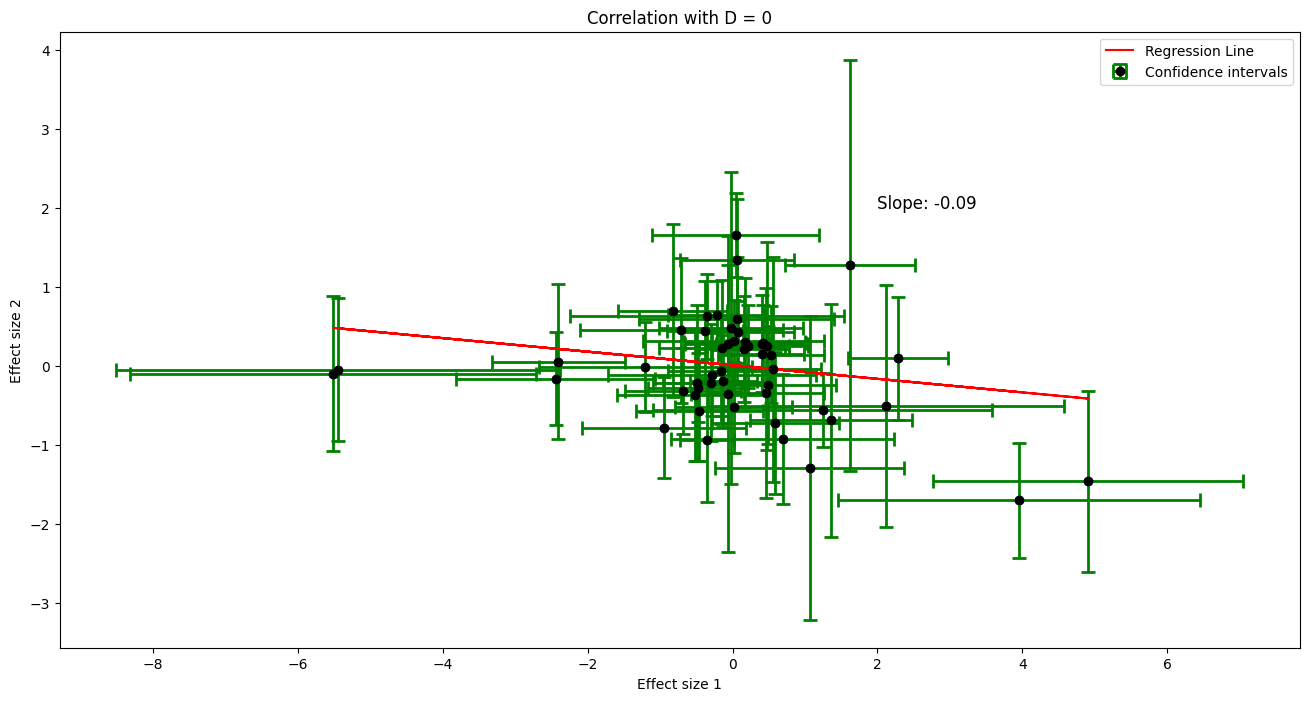

In [42]:
# We stratify the data into D = 0 and D > 0
# First, D = 0
zero_df = beta_df[beta_df['D_vals'] == 0]

plt.scatter(zero_df['beta1'], zero_df['beta2'])

plt.errorbar(zero_df['beta1'], zero_df['beta2'], xerr=zero_df['CI1'], yerr=zero_df['CI2'], fmt='o', color='black', 
             ecolor='green', elinewidth=2, capsize=5, capthick=2, label='Confidence intervals')

x = zero_df['beta1'].to_numpy().reshape(-1, 1)
y = zero_df['beta2'].to_numpy().reshape(-1, 1)

# Weighted plot version
X_design = sm.add_constant(x)
model = sm.WLS(y, X_design, weights=zero_df['weight'])
results = model.fit()
intercept = results.params[0]
slope = results.params[1]
y_pred = intercept + slope * x
p_value = slope_pval(x, y, slope, zero_df['weight'])
print(p_value)

plt.plot(x, y_pred, color='red', label='Regression Line')
plt.text(2, 2, f'Slope: {slope:.2f}', fontsize=12, color='black')
# plt.text(2, 1.6, f'R^2: {r_squared:.2f}', fontsize=12, color='black')
plt.title('Correlation with D = 0')
plt.xlabel('Effect size 1')
plt.ylabel('Effect size 2')
plt.legend()
plt.show()

In [ ]:
# Want to see if the D=0 pairs are from the same eQTL or not

0.769


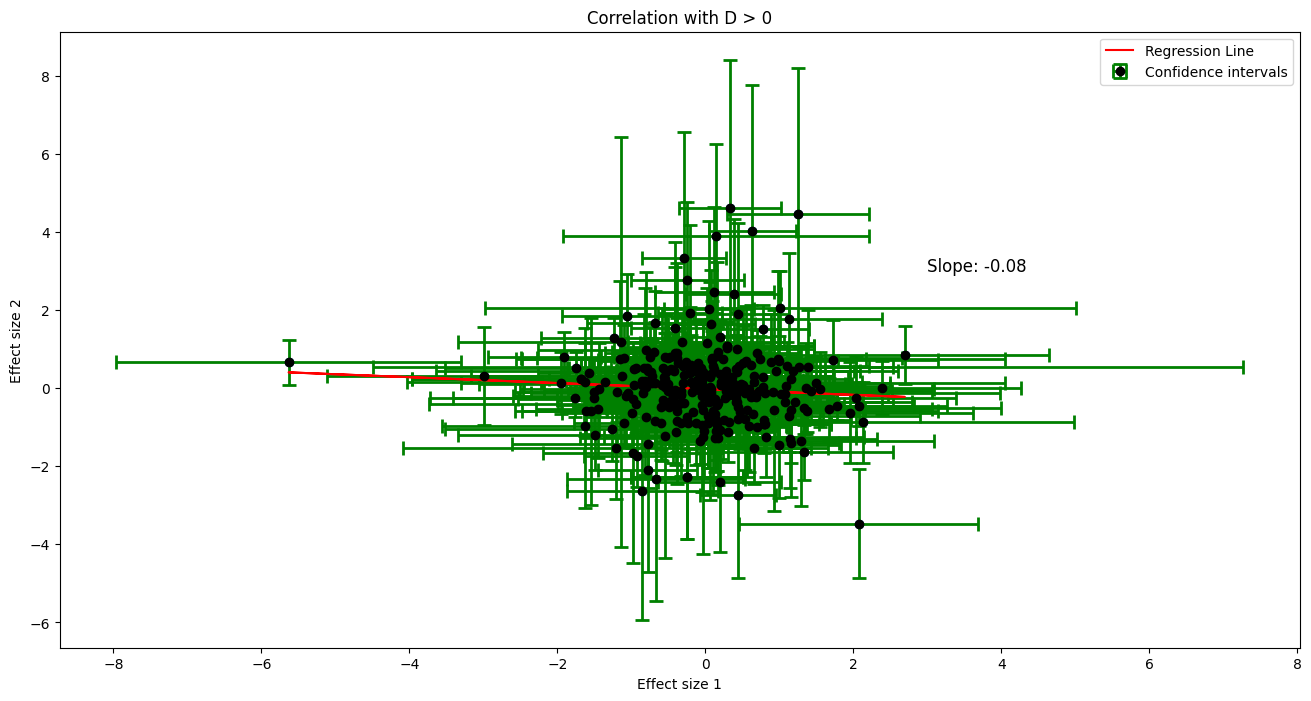

In [17]:
# Now, D > 0
pos_df = beta_df[beta_df['D_vals'] > 0]

plt.scatter(pos_df['beta1'], pos_df['beta2'])

plt.errorbar(pos_df['beta1'], pos_df['beta2'], xerr=pos_df['CI1'], yerr=pos_df['CI2'], fmt='o', color='black', 
             ecolor='green', elinewidth=2, capsize=5, capthick=2, label='Confidence intervals')

x = pos_df['beta1'].to_numpy().reshape(-1, 1)
y = pos_df['beta2'].to_numpy().reshape(-1, 1)

# Weighted plot version
X_design = sm.add_constant(x)
model = sm.WLS(y, X_design, weights=pos_df['weight'])
results = model.fit()
intercept = results.params[0]
slope = results.params[1]
y_pred = intercept + slope * x
p_value = slope_pval(x, y, slope, pos_df['weight'])
print(p_value)

plt.plot(x, y_pred, color='red', label='Regression Line')
plt.text(3, 3, f'Slope: {slope:.2f}', fontsize=12, color='black')
# plt.text(2, 1.6, f'R^2: {r_squared:.2f}', fontsize=12, color='black')
plt.xlabel('Effect size 1')
plt.ylabel('Effect size 2')
plt.title('Correlation with D > 0')
plt.legend()
plt.show()

# Martin's data

In [1]:
# Loading in the data
pvar_path = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/imp_geno_chimp/ukb_imp_chr1_v3_chimp.pvar'
example_path = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001/baseline_annot/baseline_165annots_chr1.annot.gz'

import pandas as pd

# Load the pvar file
pvar_df2 = pd.read_csv(pvar_path, sep='\t')
pvar_df2

,#CHROM,POS,ID,REF,ALT
0,1,66435,1:66435_ATT_A,A,ATT
1,1,70352,rs555652149,A,T
2,1,85988,rs531531651,T,C
3,1,88370,rs185487977,G,A
4,1,98608,rs548107800,G,A
...,...,...,...,...,...
1161336,1,249230910,rs200231347,T,C
1161337,1,249230914,rs201152607,C,T
1161338,1,249232965,rs552733802,C,T
1161339,1,249236006,1:249236006_AG_A,A,AG


In [2]:
# Load in the liftover file
bed_file = 'zhang_liftover.bed'
pvar_df = pd.read_csv(bed_file, sep='\t', header=None)
pvar_df.columns = ['#CHROM', 'Start', 'End', 'Variant', '4', '5']
pvar_df = pvar_df.sort_values(by=['#CHROM', 'End'])

/tmp/ipykernel_2964/2649516067.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pvar_df = pd.read_csv(bed_file, sep='\t', header=None)


In [7]:
# example_annot = pd.read_csv(example_path, sep='\t')
example_annot

,CHR,SNP,BP,CM,AN:Backgrd_Selection_Stat_common,AN:Backgrd_Selection_Stat_lf,AN:BivFlnk.flanking.500_common,AN:BivFlnk.flanking.500_lf,AN:BivFlnk_common,AN:BivFlnk_lf,...,AN:mbin8_common,AN:mbin9_common,AN:nucleotide_div_common,AN:nucleotide_div_lf,AN:recomb_rate_common,AN:recomb_rate_lf,AN:snpeff_nonsynonymous_variant_common,AN:snpeff_nonsynonymous_variant_lf,AN:snpeff_synonymous_variant_common,AN:snpeff_synonymous_variant_lf
0,1,1:66435_ATT_A,66435,0,0.0,0.000,False,False,False,False,...,False,False,0.0,0.000000,0.0,0.0,False,False,False,False
1,1,rs555652149,70352,0,0.0,0.000,False,False,False,False,...,False,False,0.0,0.000000,0.0,0.0,False,False,False,False
2,1,rs531531651,85988,0,0.0,0.000,False,False,False,False,...,False,False,0.0,0.000000,0.0,0.0,False,False,False,False
3,1,rs185487977,88370,0,0.0,0.000,False,False,False,False,...,False,False,0.0,0.000000,0.0,0.0,False,False,False,False
4,1,rs548107800,98608,0,0.0,0.000,False,False,False,False,...,False,False,0.0,0.000000,0.0,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161336,1,rs200231347,249230910,0,0.0,0.036,False,False,False,False,...,False,False,0.0,0.806405,0.0,0.0,False,False,False,False
1161337,1,rs201152607,249230914,0,0.0,0.036,False,False,False,False,...,False,False,0.0,0.806591,0.0,0.0,False,False,False,False
1161338,1,rs552733802,249232965,0,0.0,0.036,False,False,False,False,...,False,False,0.0,0.457337,0.0,0.0,False,False,False,False
1161339,1,1:249236006_AG_A,249236006,0,0.0,0.000,False,False,False,False,...,False,False,0.0,0.000000,0.0,0.0,False,False,False,False


In [19]:
# Convert pvar file into vcf file
import csv
from tqdm import tqdm

with open('variants.vcf', 'w') as vcf_file:
    # Iterate over the rows in the .pvar file
    for i in tqdm(range(len(pvar_df))):
        chrom = pvar_df.iloc[i, 0]  # Chromosome (e.g., chr1)
        pos = int(pvar_df.iloc[i, 2])  # Position (1-based)
        var = pvar_df.iloc[i, 3].split('_')
        ref = var[0]  # Reference allele
        alt = var[1]  # Alternate allele

        # Write the converted information to the .vcf file
        vcf_file.write(f"chr{chrom}\t{pos}\t.\t{ref}\t{alt}\t.\t.\t.\n")


100%|██████████| 1160788/1160788 [00:39<00:00, 29100.80it/s]


In [ ]:
# Reload the new bed file
bed_df = pd.read_csv('zhang_liftover.bed', sep='\t', header=None)
pvar_new_df = pd.DataFrame(0.0, index=[], columns=['chrom', 'pos', 'REF', 'ALT'])

for i in range(len(bed_df)):
    if i % 10000 == 0:
        print(i/len(bed_df))
        
    ref_alt = bed_df.iloc[i, 3].split('_')
    pvar_new_df.loc[len(pvar_new_df), :] = [bed_df.iloc[i, 0], bed_df.iloc[i, 1], ref_alt[0], ref_alt[1]]

pvar_new_df

/tmp/ipykernel_16276/3580412657.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bed_df = pd.read_csv('zhang_liftover.bed', sep='\t', header=None)
/tmp/ipykernel_16276/3580412657.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pvar_new_df.loc[len(pvar_new_df), :] = [bed_df.iloc[i, 0], bed_df.iloc[i, 1], ref_alt[0], ref_alt[1]]
/tmp/ipykernel_16276/3580412657.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pvar_new_df.loc[len(pvar_new_df), :] = [bed_df.iloc[i, 0], bed_df.iloc[i, 1], ref_alt[0], ref_alt[1]]
/tmp/ipykernel_16276/3580412657.py:10: FutureWarning: Setting an i

0.0
0.008614837506934944
0.017229675013869888
0.025844512520804833
0.034459350027739775


In [13]:
import requests
from Bio.Seq import Seq
from Bio.SeqUtils import seq1
import pandas as pd

# Ensembl API URL for fetching gene information
ENSEMBL_REST_API = "https://rest.ensembl.org"

def get_gene_at_position(chromosome, position):
    url = f"{ENSEMBL_REST_API}/overlap/region/human/{chromosome}:{position}-{position}?feature=gene"
    headers = {"Content-Type": "application/json"}
    response = requests.get(url, headers=headers)

    if response.ok:
        gene_data = response.json()
        if gene_data:
            return gene_data[0]
    return None

# Function to fetch coding sequence of gene using transcript ID
def get_cds_sequence(transcript_id):
    url = f"{ENSEMBL_REST_API}/sequence/id/{transcript_id}?content-type=application/json;type=cds"
    response = requests.get(url)
    if response.ok:
        cds_data = response.json()
        return cds_data['seq']
    return None

# Example: A function to determine if a mutation is synonymous or nonsynonymous
def is_synonymous(ref_allele, alt_allele, codon_sequence):
    """
    Check if the mutation is synonymous or nonsynonymous.
    
    ref_allele: The reference allele (usually 1 base).
    alt_allele: The alternate allele (usually 1 base).
    codon_sequence: The codon sequence to apply the mutation.
    
    Returns:
    'synonymous' or 'nonsynonymous'.
    """
    # Change the codon with the reference and alternate alleles
    ref_codon = codon_sequence[:1] + ref_allele + codon_sequence[2:]
    alt_codon = codon_sequence[:1] + alt_allele + codon_sequence[2:]
    
    # Translate both codons into their corresponding amino acids
    ref_aa = seq1(Seq(ref_codon).translate())
    alt_aa = seq1(Seq(alt_codon).translate())
    
    # Check if the amino acids are the same
    if ref_aa == alt_aa:
        return 'synonymous'
    else:
        return 'nonsynonymous'

In [29]:
import sqlite3

db_path = '/n/data2/hms/dbmi/sunyaev/lab/data/annotations/favor/6390347'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# # Example SQL query to get mutation information
# query = """
# SELECT chromosome, position, ref_allele, alt_allele, mutation_type, rsID 
# FROM variants 
# WHERE chromosome = ? AND position = ?;
# """

# # Example mutation details to query (chromosome and position)
# chromosome = "1"
# position = 123456  # Example position

# # Execute the query with parameters
# cursor.execute(query, (chromosome, position))
# mutation_details = cursor.fetchall()

# # Convert to DataFrame for easier processing
# columns = ['chromosome', 'position', 'ref_allele', 'alt_allele', 'mutation_type', 'rsID']
# df = pd.DataFrame(mutation_details, columns=columns)

# # Close the connection
# conn.close()

# # Display the mutation details
# print(df)

# Query to get all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch and print the table names
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Close the connection
conn.close()

Tables in the database: []


In [19]:
# Now annotate the genome with synonymous or nonsynonymous muts
results = []

for i in range(len(pvar_df)):
    if i % 100 == 0:
        print(i/len(pvar_df))
        
    position = pvar_df.iloc[i, 1]
    gene_info = get_gene_at_position(1, position)
    if gene_info:
        transcript_id = gene_info.get("id")
        cds_sequence = get_cds_sequence(transcript_id)
    
        if cds_sequence:
            # Id the codon that contains the mutation
            codon_start = position % 3
            codon_sequence = cds_sequence[codon_start: codon_start + 3]
    
            # Determine if mut is synonymous or nonsynonymous
            mutation_type = is_synonymous(pvar_df.iloc[i, 3], pvar_df.iloc[i, 4], codon_sequence)
            results.append(mutation_type)
        else:
            results.append('No CDS available')
    else:
        results.append('Gene not found')

results

0.0
8.610735348188e-05
0.00017221470696376
0.00025832206044564


KeyboardInterrupt: 

In [12]:
# Load in the vep file
vep_df = pd.read_csv('variants_out.vcf', comment='#', sep='\t', header=None)
cols = ['Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature', 'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position', 
        'Protein_position', 'Amino_acids', 'Codons', 'Existing variation', 'Extras']
vep_df.columns = cols
vep_df = vep_df.set_index('Location')
vep_df = vep_df.sort_values(by='Location')

In [160]:
"""
Because the normal indexing methods are too slow, we choose a different indexing method. First, we break everything down
into chromosomes. Most except for chromosome 1 are going to be tiny. Then we sort by the positions. After that, we take
each variant and its location and find what position it is in the index and build a dictionary object accordingly. 
Finally, we rename the old index with an np.arange. This means iloc will work very well and speed things up
"""
vep_dict = {}
chrompos_dict = {}
for chrom in tqdm(chroms):
    vep_dict[chrom] = vep_df[[x.split(':')[0] == f'chr{chrom}' for x in list(vep_df.index)]]
    # Rename the index for them
    new_ind = []
    for val in vep_dict[chrom].index:
        if '-' in val:
            new_ind.append(val.split(':')[1].split('-')[1])
        else:
            new_ind.append(val.split(':')[1])
    
    # Now make a position dict for these
    pos_dict = {}
    for i, val in enumerate(new_ind):
        if val not in pos_dict.keys():
            pos_dict[val] = [i]
        else:
            pos_dict[val].append(i)

    chrompos_dict[chrom] = pos_dict

    # Finally, turn the vep_dict's index into just an arange
    vep_dict[chrom].index = np.arange(len(vep_dict[chrom]))

100%|██████████| 7/7 [00:24<00:00,  3.52s/it]


In [206]:
"""
Do the annotations for synonymous/nonsynonymous mutations
Remember that the positions here are 1 indexed so the location should match the end column in pvar_df
"""
conseq_annots = []
conseq_types = pd.read_csv('consequence_types.txt', sep='\t')

for i in tqdm(np.arange(len(pvar_df))):
    chrom = int(pvar_df.iloc[i, 0])
    pos = pvar_df.iloc[i, 2]
    if str(pos) in chrompos_dict[chrom].keys():
        """
        This is how we subset. We have the location so we find the appropriate positions within the dataframe.
        We then subset for those positions with iloc. It's much faster
        """
        positions = chrompos_dict[chrom][str(pos)]
        subset = vep_dict[chrom].iloc[positions, :]
        
        if len(subset['Consequence']) == 1:
            precon = {subset['Consequence'].item()}
        else:
            precon = list(set(subset['Consequence']))
        consequences = []
        for elem in [x.split(',') for x in precon]:
            consequences.extend(elem)
        consequences = list(set(consequences))
        impact = set(conseq_types.loc[consequences, :]['IMPACT'])
    
        # Given the consequences, we want to annotate correctly
        if 'synonymous_variant' in consequences:
            conseq_annots.append('synonymous_variant')
        elif ('HIGH' in impact) or ('MODERATE' in impact) or ('LOW' in impact):
            conseq_annots.append(conseq_types.loc[consequences, :].index[0])
        elif impact == {'MODIFIER'}:
            # In the case they're all modifiers
            conseq_annots.append('noncoding') 
    else:
        conseq_annots.append(None)

pvar_df.iloc[0:len(conseq_annots), 8] = conseq_annots
pvar_df = pvar_df[pvar_df['consequence'] != 0]

100%|█████████▉| 1160491/1160788 [09:11<00:00, 2104.86it/s]


ValueError: invalid literal for int() with base 10: '14_GL000009v2_random'

In [18]:
# Finally, save the annotations
# pvar_df.to_csv('annotated_zhang_data.csv', sep='\t')
pvar_df = pd.read_csv('annotated_zhang_data.csv', sep='\t', index_col=0)

In [48]:
# Let's get phyloP scores now
phylo_path = '/n/data2/hms/dbmi/sunyaev/lab/emkoch/raKLette/data/phylogenetic_constraint/illumina_phylop_primates_processed'
phylo_annots = {}

chr_set = set(np.arange(1, 20)) | set([str(x) for x in np.arange(1, 20)])
chroms = set(pvar_df['#CHROM'])  & chr_set
chroms = set([str(x) for x in chroms])
chroms = [int(x) for x in chroms]

for i in tqdm(chroms):
    df = pd.read_csv(f'{phylo_path}/chr{i}.bed.gz', compression='gzip', sep='\t', header=None)
    new_cols = ['chr', 'start', 'end', 'phyloP']
    df.columns = new_cols
    df = df.set_index('start')
    phylo_annots[i] = df

100%|██████████| 7/7 [07:08<00:00, 61.23s/it]


In [4]:
# Rename the columns in the phyloP
from tqdm import tqdm

# Now annotate stuff
annots = []
for i in tqdm(range(len(pvar_df))):
    pos = pvar_df.iloc[i, 1]
    chrom = pvar_df.iloc[i, 0]
    if chrom in chroms:
        if pos in phylo_annots[chrom].index:
            annots.append(phylo_annots[chrom].loc[pos, 'phyloP'])
        else:
            annots.append(None)
    else:
        annots.append(None)

pvar_df['phyloP'] = annots

  0%|          | 0/1160788 [00:00<?, ?it/s]


NameError: name 'chroms' is not defined

### Recombination annotation

In [5]:
recomb_path = '/home/sjg319/complex_traits/recomb_maps'
# These are the paternal crossovers
map1 = pd.read_csv(f'{recomb_path}/aau1043_datas1', sep='\t', skiprows=7)
# These are the maternal crossovers
map2 = pd.read_csv(f'{recomb_path}/aau1043_datas2', sep='\t', skiprows=7)

map1 = map1.set_index('Begin')
map2 = map2.set_index('Begin')

# Split maps into their chromosomes
map_chroms = list(set(map1['Chr']))
map_dict = {}
for mc in tqdm(map_chroms):
    map_dict[mc] = [map1[map1['Chr'] == mc], map2[map2['Chr'] == mc]]

100%|██████████| 22/22 [00:02<00:00,  9.35it/s]


In [70]:
"""
Now we annotate. The idea is to get the chromosome and position for each variant. Then we check if that chromosome is in
the chromosomes we have loaded. If so, we get the appropriate recomb dict from the previous cell and average the 
recomb rates over the paternal and maternal crossovers. We do this for all variants and finally store the results
"""
recomb_rates = []
for i in tqdm(range(len(pvar_df))):
    # Get the position
    pos = pvar_df.iloc[i, 1]
    chrom = pvar_df.iloc[i, 0]
    if chrom in chroms:
        m1 = map_dict[f'chr{chrom}'][0]
        m2 = map_dict[f'chr{chrom}'][1]
        pairs = m1.index[m1.index < pos]
        if len(pairs) > 0:
            pair = pairs.max()
            r = (m1.loc[pair, 'cMperMb'] + m2.loc[pair, 'cMperMb'])/2
            recomb_rates.append(r)
        else:
            recomb_rates.append(None)
    else:
        recomb_rates.append(None)

pvar_df['recomb_rates'] = recomb_rates

100%|██████████| 1160788/1160788 [04:00<00:00, 4833.35it/s] 


In [36]:
# We just need to do some final formatting of the data. This involves going from position in
# hg39 to hg18
import pandas as pd

ann_df = pd.read_csv('/n/data2/hms/dbmi/sunyaev/lab/sgandhi/effect_size/zhang_data/annotations/chr1_annots.csv', sep='\t', index_col=0)
ann_df

/tmp/ipykernel_9794/1320789247.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ann_df = pd.read_csv('/n/data2/hms/dbmi/sunyaev/lab/sgandhi/effect_size/zhang_data/annotations/chr1_annots.csv', sep='\t', index_col=0)


,#CHROM,Start,End,Variant,SNP,5,recomb_rates,phyloP,consequence
131072,1,24204963,24204964,T_C,rs4350147,+,0.255120,-0.094,noncoding
131073,1,24205036,24205037,G_C,rs55746212,+,0.255120,0.170,noncoding
131074,1,24205143,24205144,A_C,rs946662,+,0.198225,-1.406,noncoding
131075,1,24205514,24205515,G_C,rs72650437,+,0.198225,0.718,noncoding
131076,1,24205576,24205577,A_G,rs6696471,+,0.198225,-0.456,noncoding
...,...,...,...,...,...,...,...,...,...
620678,Un_KI270742v1,86933,86934,T_G,rs544834526,+,NaN,NaN,NaN
620679,Un_KI270742v1,106999,107000,A_C,rs146282329,+,NaN,NaN,NaN
620680,Un_KI270742v1,118870,118871,C_T,rs571269785,+,NaN,NaN,NaN
620681,Un_KI270742v1,129495,129496,G_C,rs537469813,+,NaN,NaN,NaN


In [40]:
# Column End will be the final position
from tqdm import tqdm 

pvar_dict = {}
for i in tqdm(range(len(pvar_df2))):
    chrom = pvar_df2['#CHROM'].iloc[i]
    pos = pvar_df2['POS'].iloc[i]
    ID = pvar_df2['ID'].iloc[i]
    pvar_dict[ID] = [chrom, pos]

new_chrom = []
new_pos = []

for i in tqdm(range(len(ann_df))):
    SNP = ann_df['SNP'].iloc[i]
    new_pos.append(pvar_dict[SNP][1])
    new_chrom.append(pvar_dict[SNP][0])

# add in new columns and reorder/rename things
ann_df['#CHROM'] = new_chrom
ann_df = ann_df.drop(columns=['Start', 'End'])
ann_df['BP'] = new_pos
ann_df = ann_df.rename(columns={'#CHROM': 'CHR'})
ann_df = ann_df[['CHR', 'SNP', 'BP', 'Variant', 'recomb_rates', 'phyloP', 'consequence']]

# Comparison with Misha's simulations

In [3]:
# First, we load in the file created from the python script
OUTPUT_DIR="/n/data2/hms/dbmi/sunyaev/lab/sgandhi/effect_size/Misha_sims/processed_outs"
m1 = pd.read_csv(f'{OUTPUT_DIR}/chrs010.txt.gz', compression='gzip', sep='\t', header=None)
m2 = pd.read_csv(f'{OUTPUT_DIR}/chrs_m0.01.txt.gz', compression='gzip', sep='\t', header=None)
m3 = pd.read_csv(f'{OUTPUT_DIR}/chrs_m0.03.txt.gz', compression='gzip', sep='\t', header=None)
m4 = pd.read_csv(f'{OUTPUT_DIR}/chrs_m0.003.txt.gz', compression='gzip', sep='\t', header=None)
m5 = pd.read_csv(f'{OUTPUT_DIR}/chrs_m0.001.txt.gz', compression='gzip', sep='\t', header=None)

misha_df = pd.concat([m1, m2, m3, m4, m5])

# What is each column?
misha_df.columns = ['file', 'chr', 'LD sign', 'beta 1 sign', 'beta 2 sign', 'MAF']

betas = {0.01: 'b001', 0.03: 'b003', 0.1: 'b010'}
MAF = [0.1, 0.03, 0.01, 0.003, 0.001]

In [4]:
# Let's try subsetting for positive LD
pos_df = misha_df[misha_df['LD sign'] == 1]
# np.mean(pos_df['beta 1 sign'] * pos_df['beta 2 sign'])
pos_df

,file,chr,LD sign,beta 1 sign,beta 2 sign,MAF
0,46536013_100_mu1e-8_C1000_b001.vcf.gz,1,1,1.0,-1.0,0.100
1,46536013_100_mu1e-8_C1000_b001.vcf.gz,4,1,1.0,1.0,0.100
2,46536013_100_mu1e-8_C1000_b001.vcf.gz,4,1,1.0,1.0,0.100
3,46536013_100_mu1e-8_C1000_b001.vcf.gz,4,1,1.0,1.0,0.100
5,46536013_100_mu1e-8_C1000_b001.vcf.gz,17,1,-1.0,1.0,0.100
...,...,...,...,...,...,...
8679374,46536017_9_mu1e-8_C1000_b003.vcf.gz,627,1,-1.0,1.0,0.001
8679495,46536017_9_mu1e-8_C1000_b003.vcf.gz,826,1,1.0,-1.0,0.001
8679529,46536017_9_mu1e-8_C1000_b003.vcf.gz,879,1,-1.0,-1.0,0.001
8679597,46536017_9_mu1e-8_C1000_b003.vcf.gz,975,1,-1.0,1.0,0.001


In [5]:
# Let's calculate the correlations
pos_corr = pd.DataFrame(0.0, index=list(betas.keys()), columns=MAF)
neg_corr = pd.DataFrame(0.0, index=list(betas.keys()), columns=MAF)
Misha_pos = misha_df[misha_df['LD sign'] == 1]
Misha_neg = misha_df[misha_df['LD sign'] == -1]

for beta in betas.keys():
    for m in MAF:
        subset_pos = Misha_pos[Misha_pos['MAF'] == m]
        subset_pos = subset_pos[[betas[beta] in x for x in subset_pos['file']]]

        subset_neg = Misha_neg[Misha_neg['MAF'] == m]
        subset_neg = subset_neg[[betas[beta] in x for x in subset_neg['file']]]

        pos_corr.loc[beta, m] = np.mean(subset_pos['beta 1 sign'] * subset_pos['beta 2 sign'])
        neg_corr.loc[beta, m] = np.mean(subset_neg['beta 1 sign'] * subset_neg['beta 2 sign'])

In [6]:
pos_corr.index = 20000* pos_corr.index**2

In [7]:
pos_corr

,0.100,0.030,0.010,0.003,0.001
2.0,-0.463049,-0.297497,-0.207672,-0.150228,-0.117858
18.0,-0.986131,-0.927349,-0.786355,-0.597011,-0.459257
200.0,-1.000000,-1.000000,-0.999115,-0.978312,-0.892240


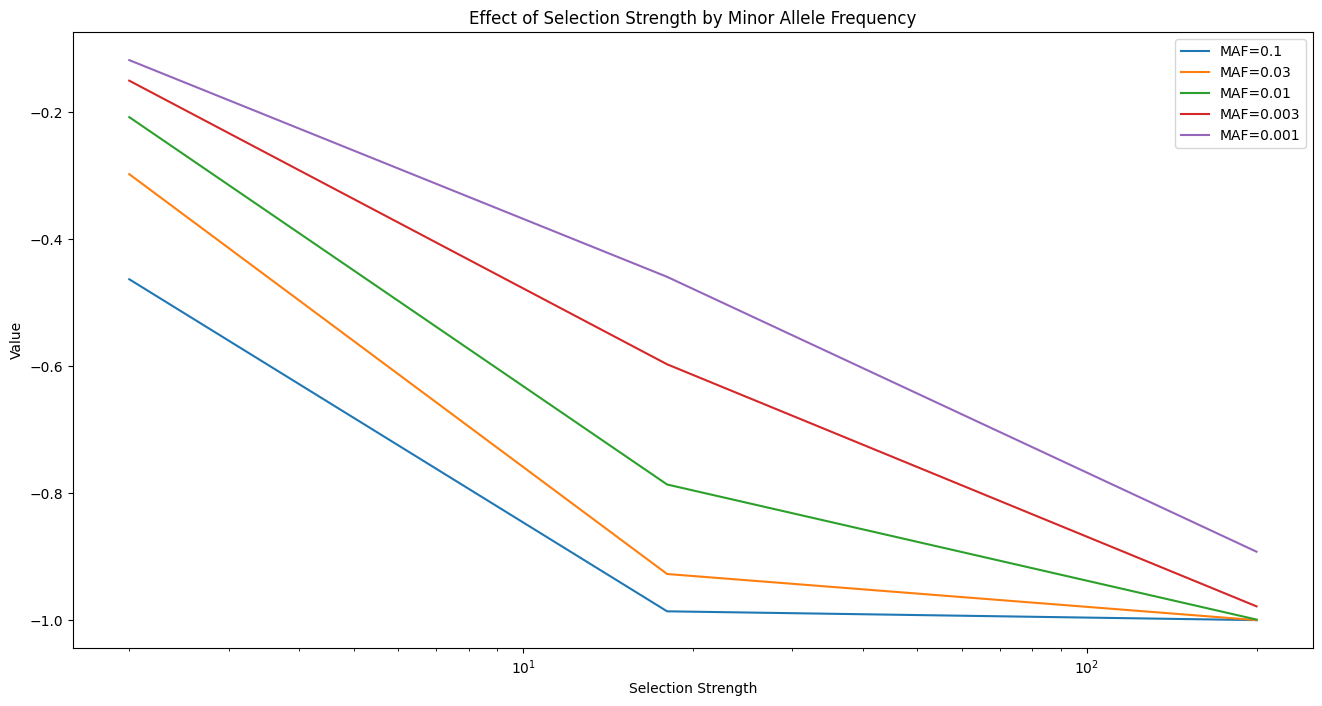

In [19]:
for col in pos_corr.columns:
    plt.plot(pos_corr.index, pos_corr[col], label=f'MAF={col}')

plt.xlabel('Selection Strength')
plt.ylabel('Value')
plt.xscale('log')
plt.title('Effect of Selection Strength by Minor Allele Frequency')
plt.legend()
plt.show()

In [10]:
corrs = pd.read_csv('dataframes/underdominant/corr_csv_pos_d.csv', index_col=0)
# corrs.iloc[:, -1] = -1
new_labs = [2*20000*float(x)**2 for x in corrs.columns]
corrs.columns = new_labs

drop = []
for x in corrs.columns:
    if np.sum(corrs[x] == 0) == len(corrs):
        drop.append(x)
        
corrs = corrs.drop(drop, axis=1)

for x in corrs.columns:
    for i in corrs.index:
        if corrs.loc[i, x] == 0:
            corrs.loc[i, x] = -1

In [11]:
for i, ind in tqdm(enumerate(corrs.index)):
    plt.scatter(corrs.columns/1.7, corrs.loc[ind, :], label=f'Polygenic simulation MAF {ind}', color=cmap(norm(MAF_thr_values[i])))
    plt.scatter(corrs.columns/1.7, corrs.loc[ind, :], color=cmap(norm(MAF_thr_values[i])))

,0.177828,0.226518,0.288539,0.367541,0.468175,0.596362,0.759648,0.967641,1.232583,1.570068,...,2844.995820,3623.962320,4616.211667,5880.141202,7490.137597,9540.954763,12153.290460,15480.889772,19719.593547,25118.864315
0.001,-0.021338,-0.014031,-0.018549,-0.025998,-0.038923,-0.037899,-0.050054,-0.063200,-0.080248,-0.099000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0.003,-0.024051,-0.017344,-0.023623,-0.034085,-0.046944,-0.051243,-0.060003,-0.080458,-0.099728,-0.125426,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0.010,-0.027711,-0.025603,-0.034030,-0.045093,-0.061305,-0.069751,-0.081724,-0.107363,-0.129374,-0.167115,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0.030,-0.033512,-0.039341,-0.051536,-0.063249,-0.077439,-0.094806,-0.113365,-0.145498,-0.184327,-0.229371,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0.100,-0.050362,-0.058465,-0.072108,-0.095913,-0.112508,-0.145460,-0.179496,-0.229223,-0.281517,-0.361908,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [17]:
corr_sets = {}
for MAF_thr in tqdm(MAF_thr_values):
    corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    corr_sets[MAF_thr] = corr_set

100%|██████████| 5/5 [02:12<00:00, 26.60s/it]


100%|██████████| 5/5 [00:00<00:00, 701.08it/s]
5it [00:00, 299.67it/s]


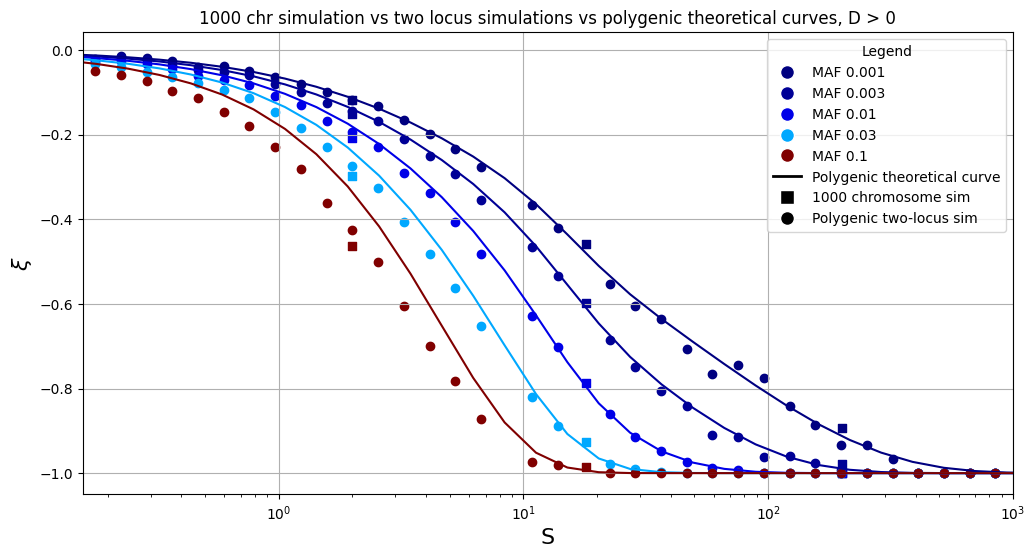

In [21]:
# Now we compare to the theoretical curves produced by polygenic selection
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

from effect_size_correlation import *

plt.rcParams['figure.figsize'] = [12, 6]
cmap = plt.cm.jet
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 40)

# Plot analytical curves
for MAF_thr in tqdm(MAF_thr_values):
    # corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_sets[MAF_thr], color=cmap(norm(MAF_thr)))

# Plot 1000 chromosome simulation points (squares)
for i, col in enumerate(pos_corr.columns):
    plt.scatter(pos_corr.index, pos_corr[col], color=cmap(norm(float(col))), marker='s')

# Plot polygenic simulation points (circles)
for i, ind in tqdm(enumerate(corrs.index)):
    plt.scatter(corrs.columns, corrs.loc[ind, :], color=cmap(norm(MAF_thr_values[i])), marker='o')

# Plot formatting
plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize=16)
plt.ylabel("$\\xi$", fontsize=16)

ax = plt.gca()
ax.set_xlim([10**(-0.8), 10**(3)])

# Create legend entries

# 1. MAF color legend (all use circle, but just to show color)
maf_handles = [
    Line2D([0], [0], marker='o', color='w', label=f"MAF {maf}",
           markerfacecolor=cmap(norm(maf)), markersize=10, lw=0)
    for maf in MAF_thr_values
]

# 2. Shape-type legend (fixed neutral color)
type_handles = [
    Line2D([0], [0], color='black', lw=2, label='Polygenic theoretical curve'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize=10, label='1000 chromosome sim'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Polygenic two-locus sim')
]

# Combine both into one legend
all_handles = maf_handles + type_handles
plt.legend(handles=all_handles, loc='upper right', title='Legend')

plt.title('1000 chr simulation vs two locus simulations vs polygenic theoretical curves, D > 0')
plt.savefig('plots/1000chrs_vs_twoloc_vs_analytics_posd.pdf')
plt.show()

In [52]:
# We'll also make a scatter plot of the individual correlations to visualize the spread
corr_spread = {}
for m in MAF:
    corr_spread[m] = {}
    for beta in betas.keys():
        single_sim = pos_df[[betas[beta] in x for x in pos_df['file']]]
        single_sim = single_sim[single_sim['MAF'] == m]
        
        # Break this one beta and MAF instance into the individual simulations
        ind_sims = list(set(single_sim['file']))
        corrs = []
        for sim in tqdm(ind_sims):
            subset = single_sim[single_sim['file'] == sim]
            corrs.append(np.mean(subset['beta 1 sign'] * subset['beta 2 sign']))

        corr_spread[m][beta] = corrs

100%|██████████| 1907/1907 [00:00<00:00, 2528.34it/s]


In [59]:
arrays = []
xlabels = []
for m in MAF:
    for beta in betas.keys():
        arrays.append(corr_spread[m][beta])
        xlabels.append(f'beta {beta}, MAF {m}')

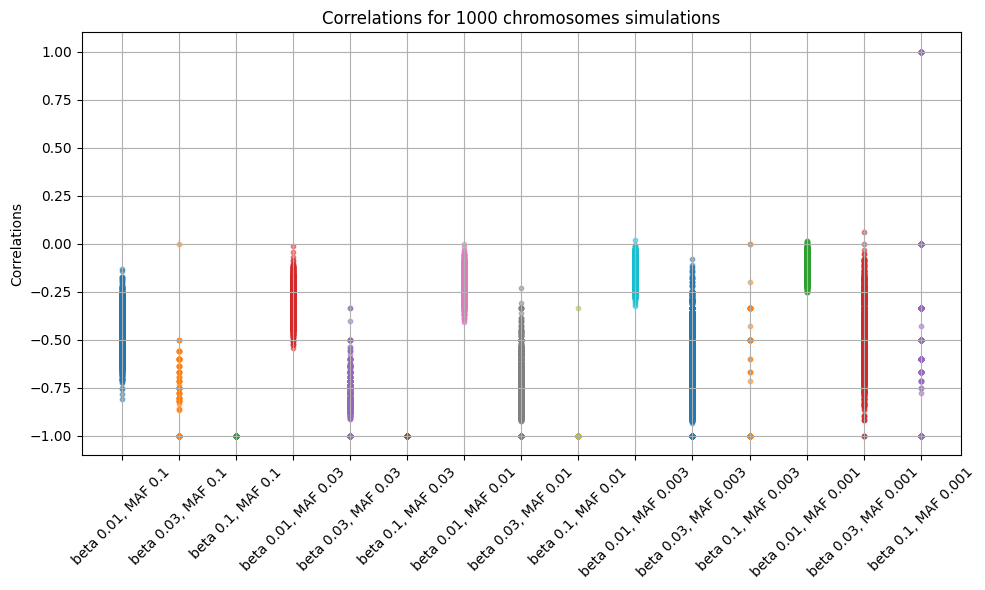

In [64]:
# Plotting
plt.figure(figsize=(10, 6))

x_positions = np.arange(15)
for i, arr in enumerate(arrays):
    x_vals = [x_positions[i]] * len(arr)  # same x for all points in this array
    plt.scatter(x_vals, arr, alpha=0.5, s=10)  # alpha controls transparency, s is size

# Customize the plot

plt.xticks(x_positions, [xlabels[i] for i in range(len(arrays))], rotation=45)
plt.ylabel('Correlations')
plt.title('Correlations for 1000 chromosomes simulations')
plt.grid(True)
plt.tight_layout()

plt.show()
